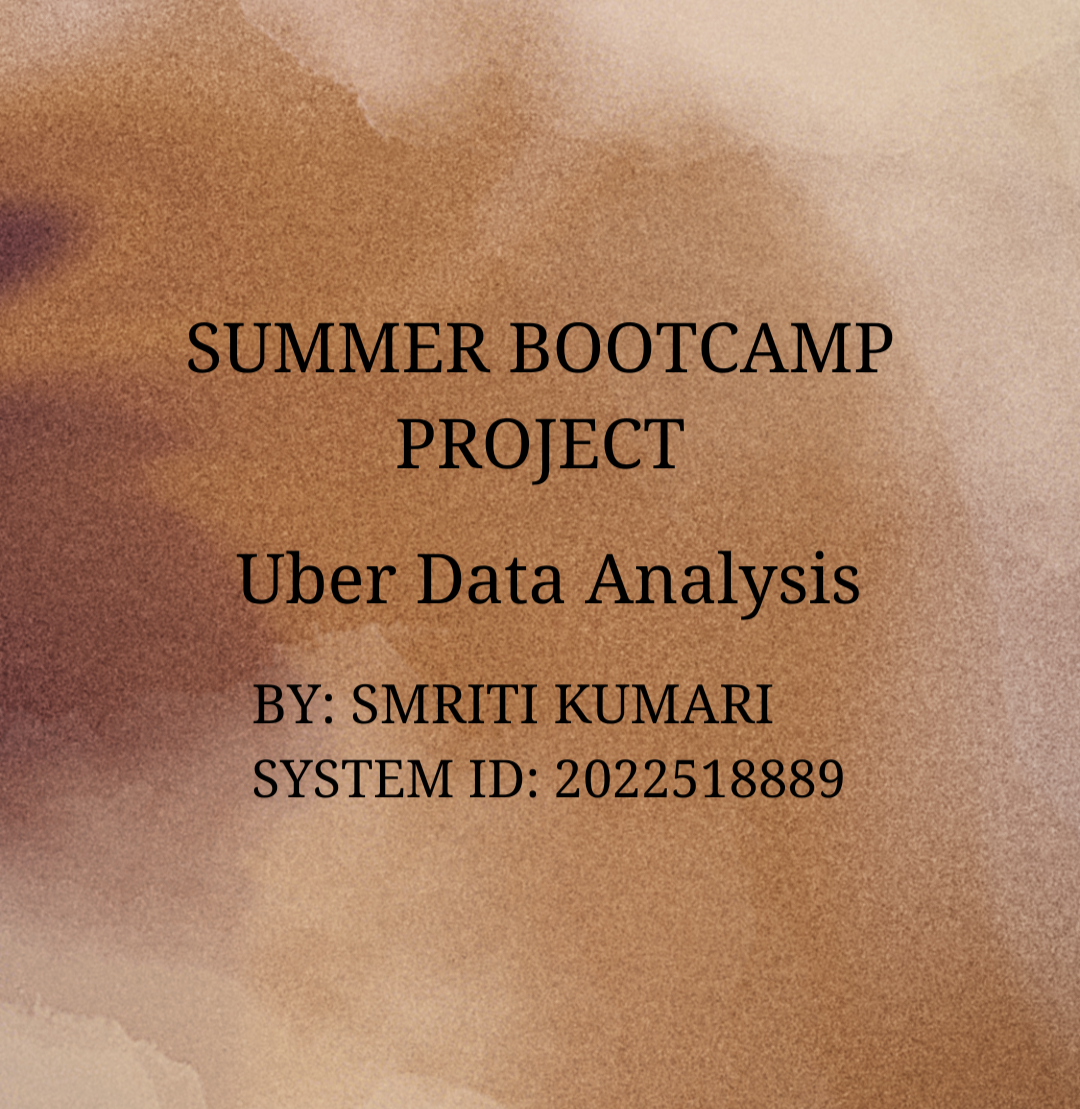

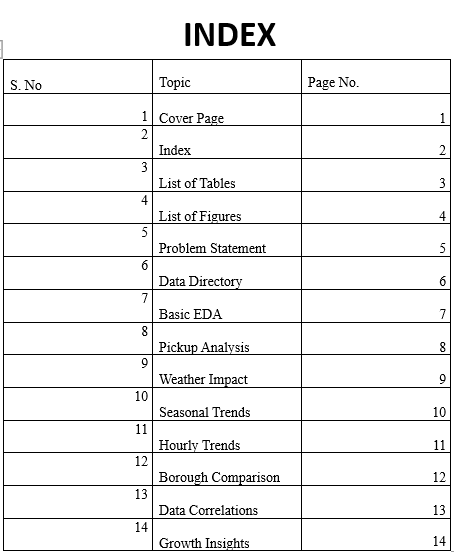

## List of Tables

## List of Figures

# 1
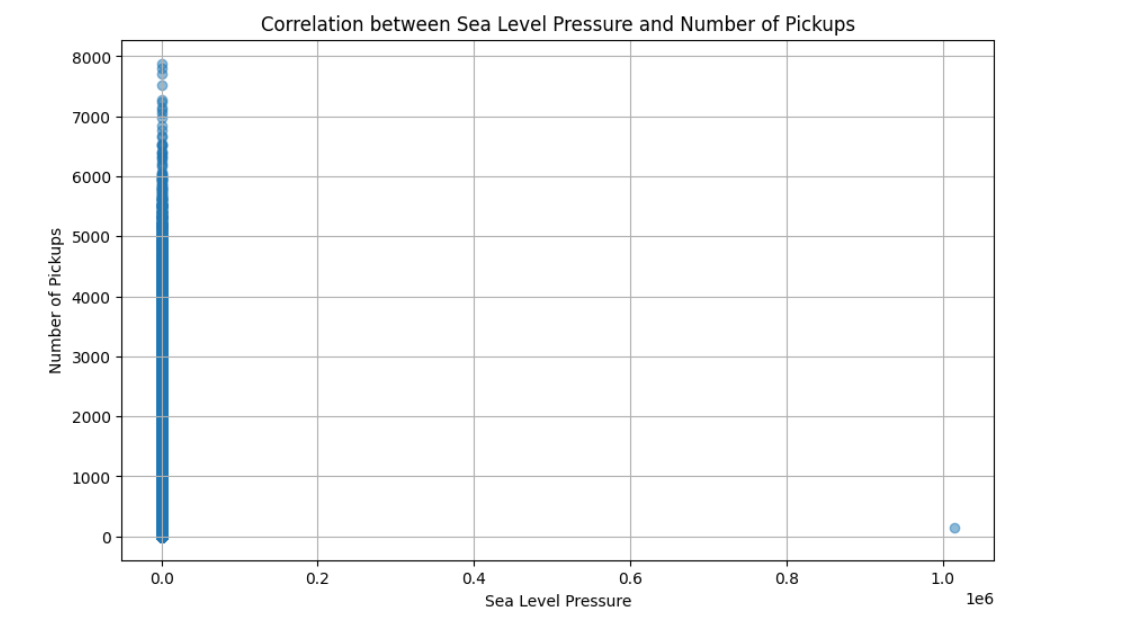




# 2
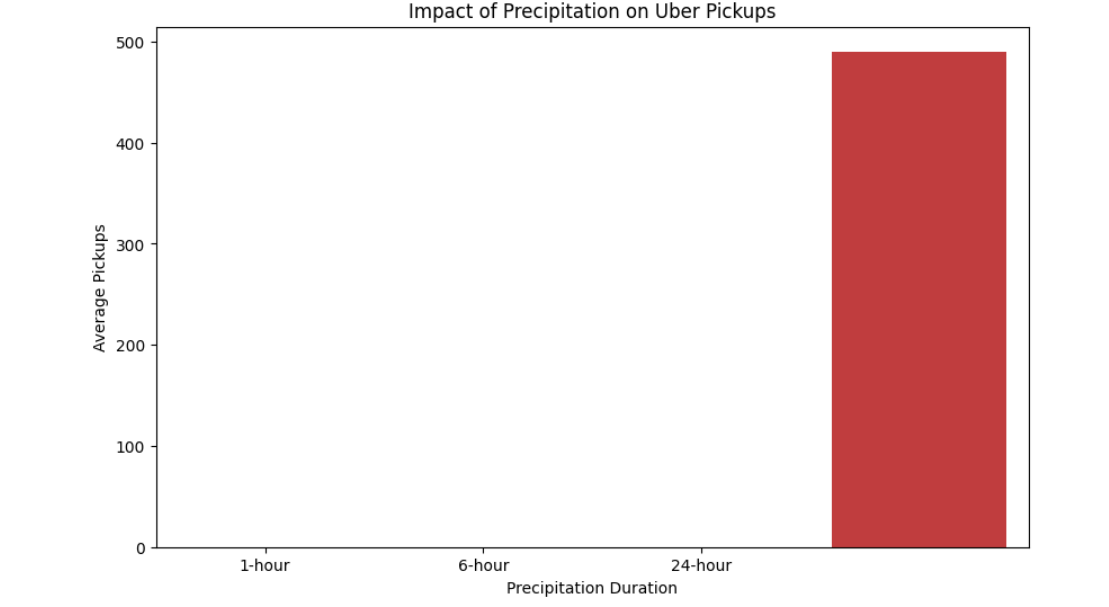


# 3
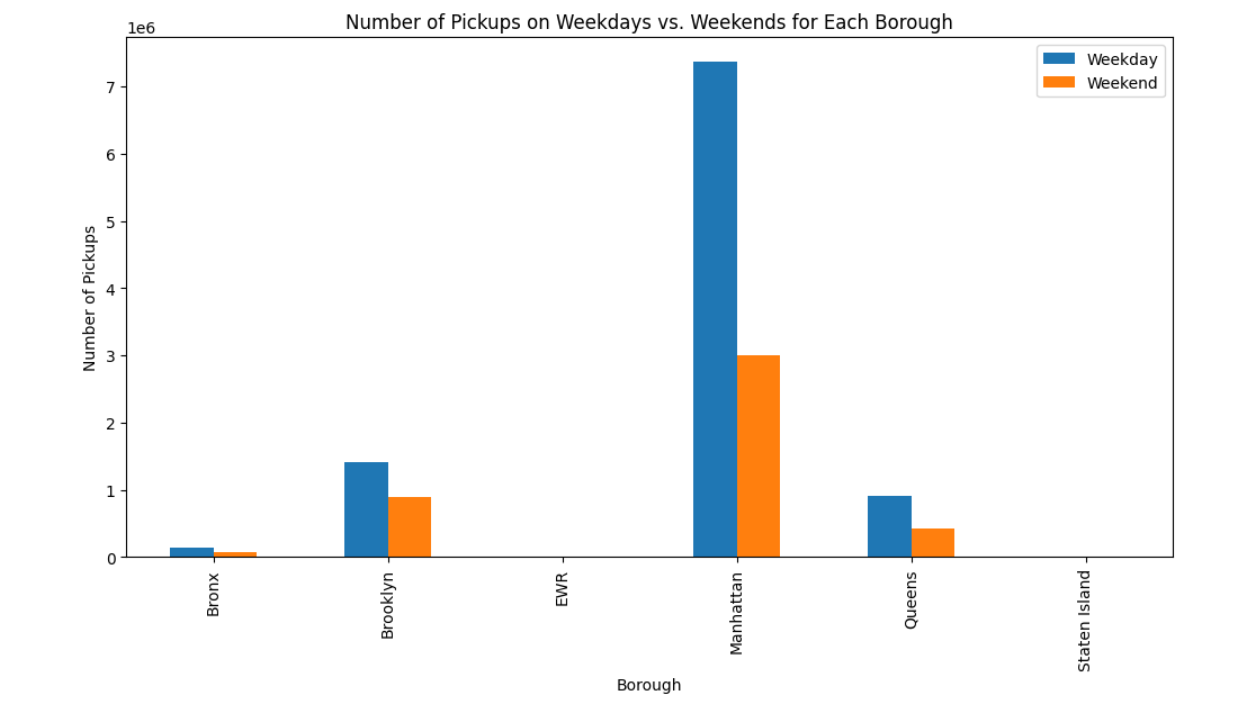3


# 4
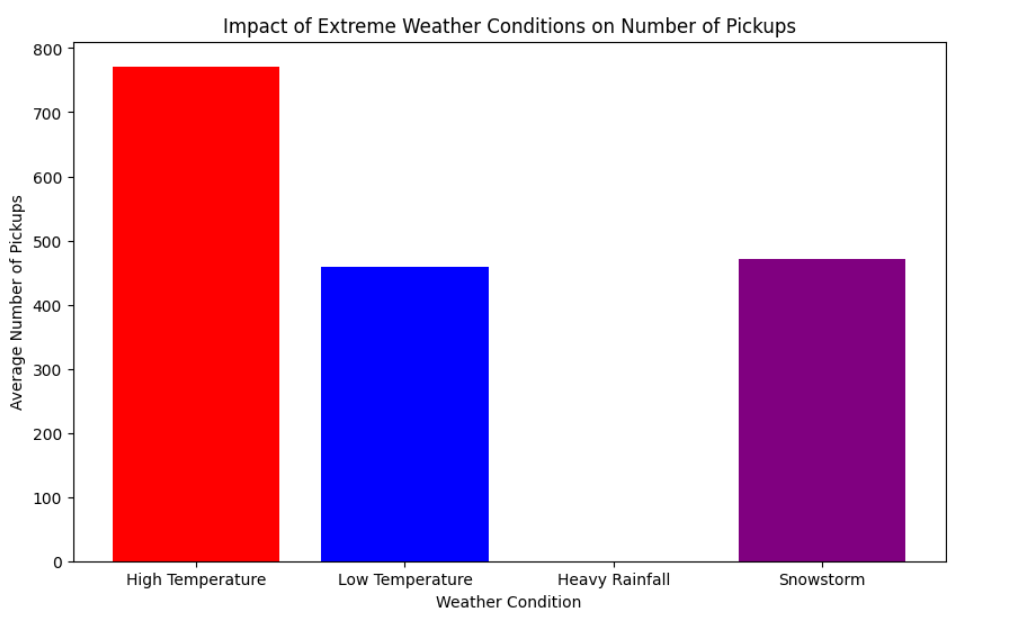4


# 5
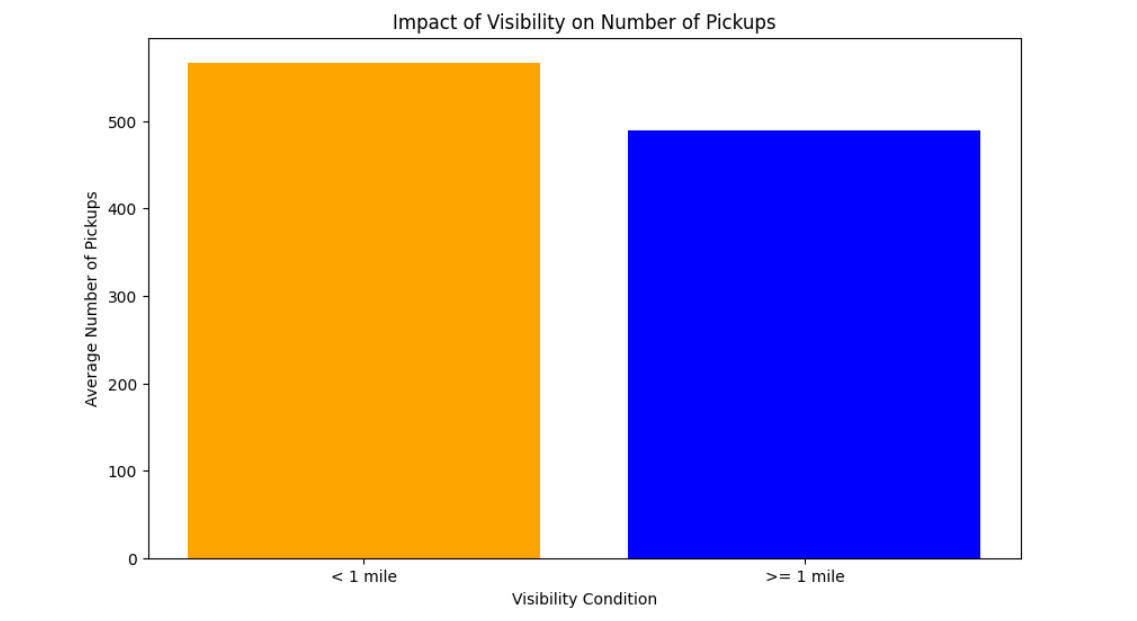5 


# 6
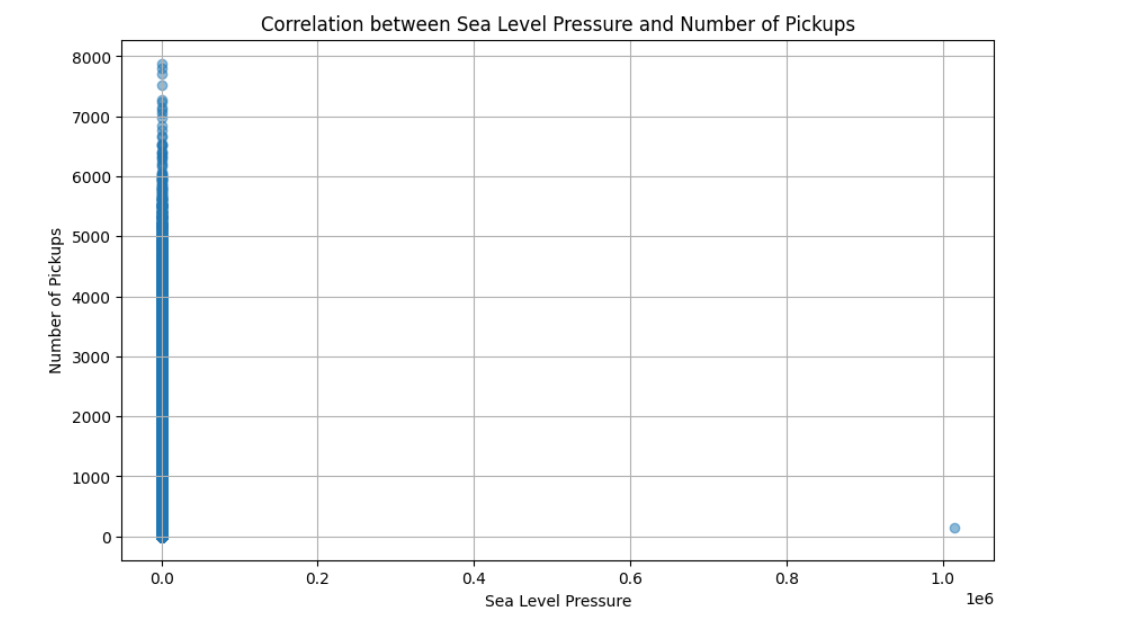6


# 7
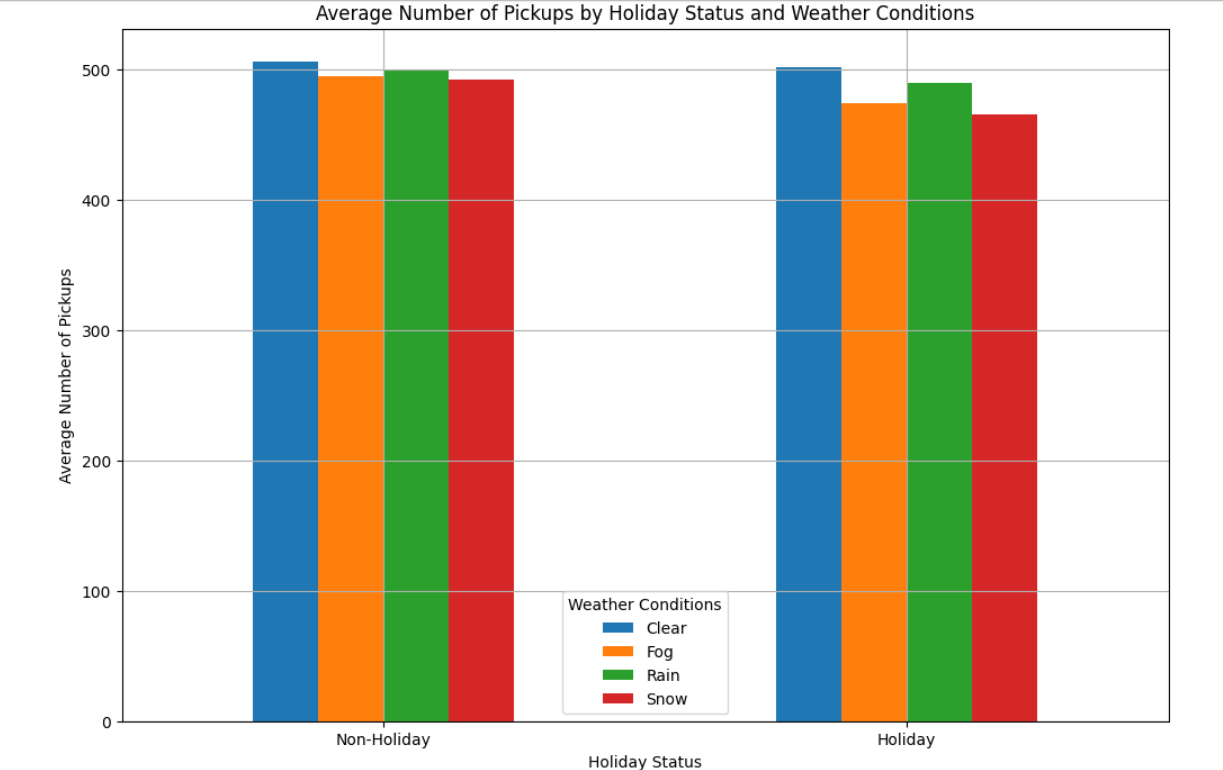


# 8
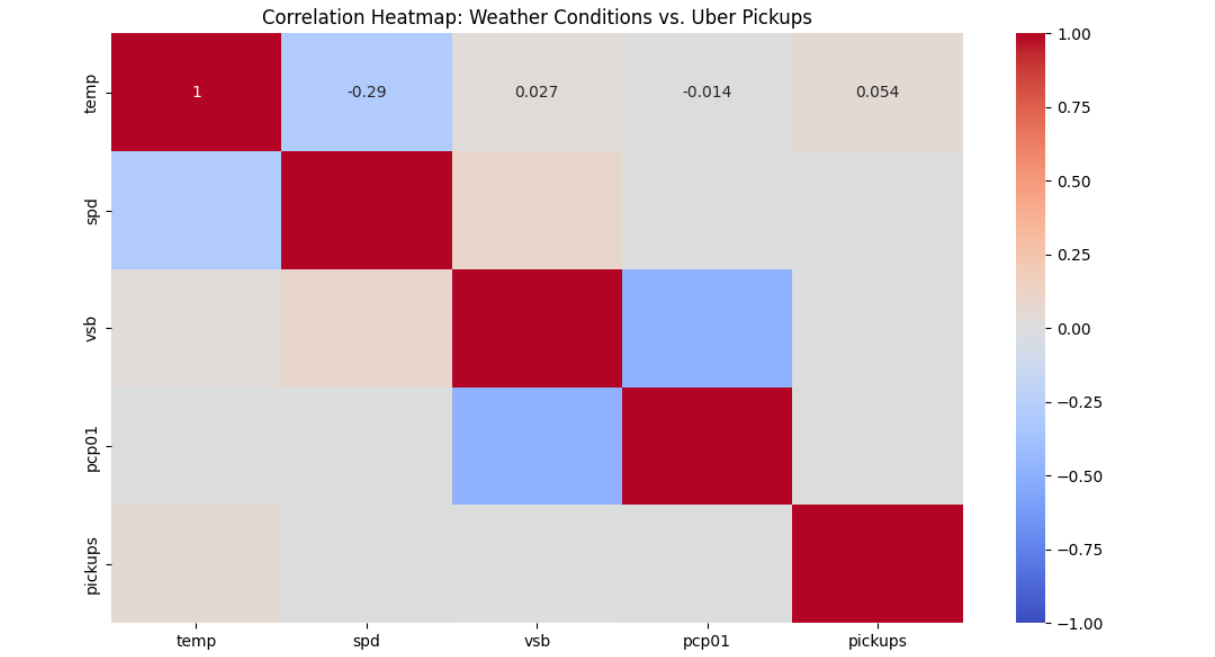8


# 9
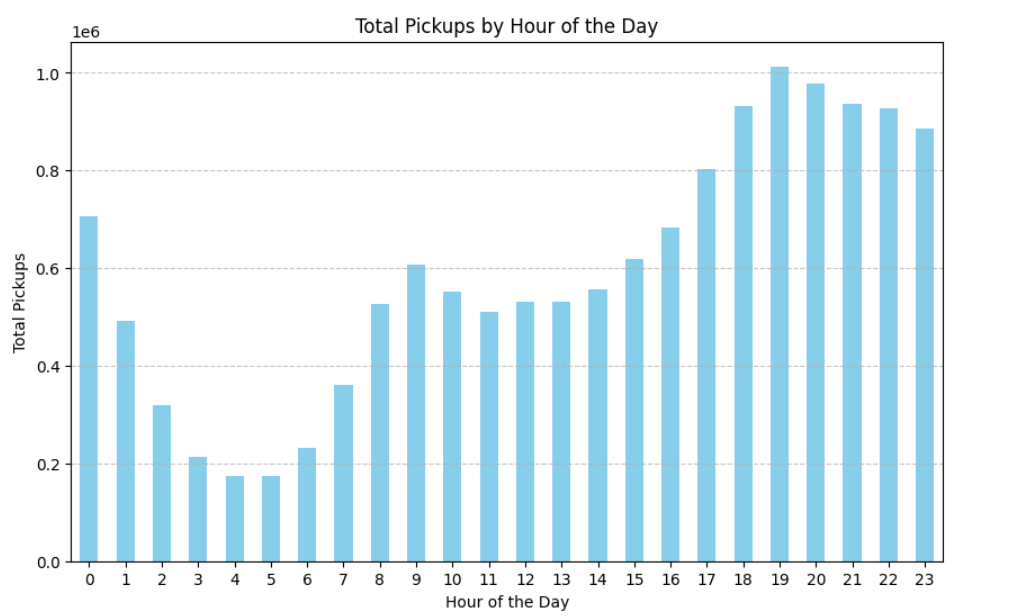


## Uber Data Analysis
*  Objective: The objective of this project is to perform an in-depth analysis of Uber ride data across various boroughs of New York City to uncover patterns, trends, and correlations that can inform strategic decisions for optimizing Uber operations.
* Problem Statement: Uber, a leading ride-sharing company, seeks to enhance its service efficiency and rider satisfaction by understanding the intricate dynamics of ride demand across New York City.                                                                                                                                                                                                               

## Data Description

* The data contains the details for the Uber rides across various boroughs (subdivisions) of New York City at an hourly level and attributes associated with weather conditions at that time.
* 	pickup_dt: Date and time of the pick-up.
* 	borough: NYC's borough.
*	pickups: Number of pickups for the period (hourly).
*	spd: Wind speed in miles/hour.
*	vsb: Visibility in miles to the nearest tenth.
*	temp: Temperature in Fahrenheit.
*	dewp: Dew point in Fahrenheit.
*	slp: Sea level pressure.
*	pcp01: 1-hour liquid precipitation.
*	pcp06: 6-hour liquid precipitation.
*	pcp24: 24-hour liquid precipitation.
*	sd: Snow depth in inches.
*	hday: Being a holiday (Y) or not (N).


# Importing Libraries

In [54]:
import os
os.getcwd()

'C:\\Users\\91983'

In [55]:
import warnings
warnings.filterwarnings("ignore")

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Basic Steps

In [57]:
# Load the data
data = pd.read_csv('Uber dataset.csv')

# 1- Display the top 5 rows.

In [58]:
# 1- Display the top 5 rows.
data.head()

pickup_dt    borough  pickups  spd   vsb  temp  dewp     slp  pcp01  \
0  01-01-2015 01:00      Bronx    152.0  5.0  10.0  30.0   7.0  1023.5    0.0   
1  01-01-2015 01:00   Brooklyn   1519.0  5.0  10.0   NaN   7.0  1023.5    0.0   
2  01-01-2015 01:00        EWR      0.0  5.0  10.0  30.0   7.0  1023.5    0.0   
3  01-01-2015 01:00  Manhattan   5258.0  5.0  10.0  30.0   7.0  1023.5    0.0   
4  01-01-2015 01:00     Queens    405.0  5.0  10.0  30.0   7.0  1023.5    0.0   

   pcp06  pcp24   sd hday  
0    0.0    0.0  0.0    Y  
1    0.0    0.0  0.0    ?  
2    0.0    0.0  0.0    Y  
3    0.0    0.0  0.0    Y  
4    0.0    0.0  0.0    Y

# Observation
* Manhattan has the highest pickups (5258), EWR has zero.
* Consistent Weather: Wind speed, visibility, and pressure are the same across boroughs.
* Data Issues: Missing temperature for Brooklyn; unclear holiday status ('?') for Brooklyn.
* Holidays: Most entries are marked as holidays (Y).

# 2- Display the last 5 rows.

In [59]:
# 2- Display the last 5 rows.
data.tail()

pickup_dt        borough  pickups  spd   vsb  temp  dewp  \
29096  30-06-2015 23:00            EWR      0.0  7.0  10.0  75.0  65.0   
29097  30-06-2015 23:00      Manhattan   3828.0  7.0  10.0  75.0  65.0   
29098  30-06-2015 23:00         Queens    580.0  7.0  10.0  75.0  65.0   
29099  30-06-2015 23:00  Staten Island      0.0  7.0  10.0  75.0  65.0   
29100  30-06-2015 23:00            NaN      3.0  7.0  10.0  75.0  65.0   

          slp  pcp01  pcp06  pcp24   sd hday  
29096  1011.8    0.0    0.0    0.0  0.0    N  
29097  1011.8    0.0    0.0    0.0  0.0    N  
29098  1011.8    0.0    0.0    0.0  0.0    N  
29099  1011.8    0.0    0.0    0.0  0.0    N  
29100  1011.8    0.0    0.0    0.0  0.0    N

# Observation
* Staten Island and EWR have zero pickups.
* Consistent Weather: Same weather conditions for all rows.
* Data Issue: Last row has missing borough and holiday status (NaN)

# 3- Check the shape of the dataset.


In [60]:
# 3- Check the shape of the dataset.
data.shape

(29101, 13)

# Observation 
- The dataset has **29,101 rows** and **13 columns**.

# 4- Check the datatypes of each feature.


In [61]:
# 4- Check the datatypes of each feature.

data.dtypes

pickup_dt     object
borough       object
pickups      float64
spd          float64
vsb          float64
temp         float64
dewp         float64
slp          float64
pcp01        float64
pcp06        float64
pcp24        float64
sd           float64
hday          object
dtype: object

# Observation
* Most columns are float64 (numerical data).
* pickup_dt, borough, and hday are object types (categorical/text data).

# 5- Check the statistical summary.


In [62]:
# 5- Check the statistical summary.
data.describe()

pickups           spd           vsb          temp          dewp  \
count  29099.000000  29101.000000  29101.000000  28742.000000  29101.000000   
mean     490.236022      5.984924      8.818125     47.900262     30.823065   
std      995.680628      3.699007      2.442897     19.800541     21.283444   
min        0.000000      0.000000      0.000000      0.000000    -16.000000   
25%        1.000000      3.000000      9.100000     32.000000     14.000000   
50%       54.000000      6.000000     10.000000     46.500000     30.000000   
75%      449.000000      8.000000     10.000000     65.000000     50.000000   
max     7883.000000     21.000000     10.000000     89.000000     73.000000   

                slp         pcp01         pcp06         pcp24            sd  
count  2.910100e+04  29101.000000  29101.000000  29101.000000  29101.000000  
mean   1.052633e+03      0.003830      0.026129      0.090464      2.529169  
std    5.945147e+03      0.018933      0.093125      0.219402      4.520325  
min    1.000000e+00      0.000000      0.000000      0.000000      0.000000  
25%    1.012500e+03      0.000000      0.000000      0.000000      0.000000  
50%    1.018200e+03      0.000000      0.000000      0.000000      0.000000  
75%    1.022900e+03      0.000000      0.000000      0.050000      2.958333  
max    1.015200e+06      0.280000      1.240000      2.100000     19.000000

# Observation 

- **Pickups:** Highly variable, with a mean of 490 and a max of 7883.
- **Wind Speed (spd):** Mean of 5.98 mph, max of 21 mph.
- **Visibility (vsb):** Mean of 8.82 miles, with many observations at 10 miles.
- **Temperature (temp):** Mean of 47.9°F, ranges from -16°F to 89°F.
- **Precipitation:** Generally low, with some outliers (e.g., max 1-hour precipitation of 0.28 inches).

# 6- Check the null values.


In [63]:
# 6- Check the null values.
data.isnull().sum()

pickup_dt       0
borough      3043
pickups         2
spd             0
vsb             0
temp          359
dewp            0
slp             0
pcp01           0
pcp06           0
pcp24           0
sd              0
hday            0
dtype: int64

# Observation 
- **Borough:** 3043 missing values.
- **Pickups:** 2 missing values.
- **Temperature:** 359 missing values.

# 7- Check the duplicate values.
data.duplicated().sum()

# Observation 

- No duplicate values found in the dataset.

In [64]:
# Define the numerical columns
numerical_cols = ['pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd']


In [65]:
# 8- Check for anomalies or wrong entries in numerical columns.
(data[numerical_cols] < 0).sum()

pickups       0
spd           0
vsb           0
temp          0
dewp       1950
slp           0
pcp01         0
pcp06         0
pcp24         0
sd            0
dtype: int64

# Observation
- `dewp` column has 1950 negative values, which are likely incorrect.

In [66]:
# For null values
data[data['hday']=='?']

pickup_dt   borough  pickups  spd   vsb  temp  dewp     slp  \
1    01-01-2015 01:00  Brooklyn   1519.0  5.0  10.0   NaN   7.0  1023.5   
123  01-01-2015 19:00    Queens    238.0  7.0  10.0  37.0   7.0  1016.2   

     pcp01  pcp06  pcp24   sd hday  
1      0.0    0.0    0.0  0.0    ?  
123    0.0    0.0    0.0  0.0    ?

# Observation on Null Values:
- There are two rows (index 1 and 123) where the `temp` column has missing values denoted by `NaN`.
- There is one row (index 1) where the `hday` column has a missing value denoted by `?`.

# 8- Check for anomalies or wrong entries in numerical columns.
* We will use IQR(Interquartile Range) for detecting outlier in our dataset.

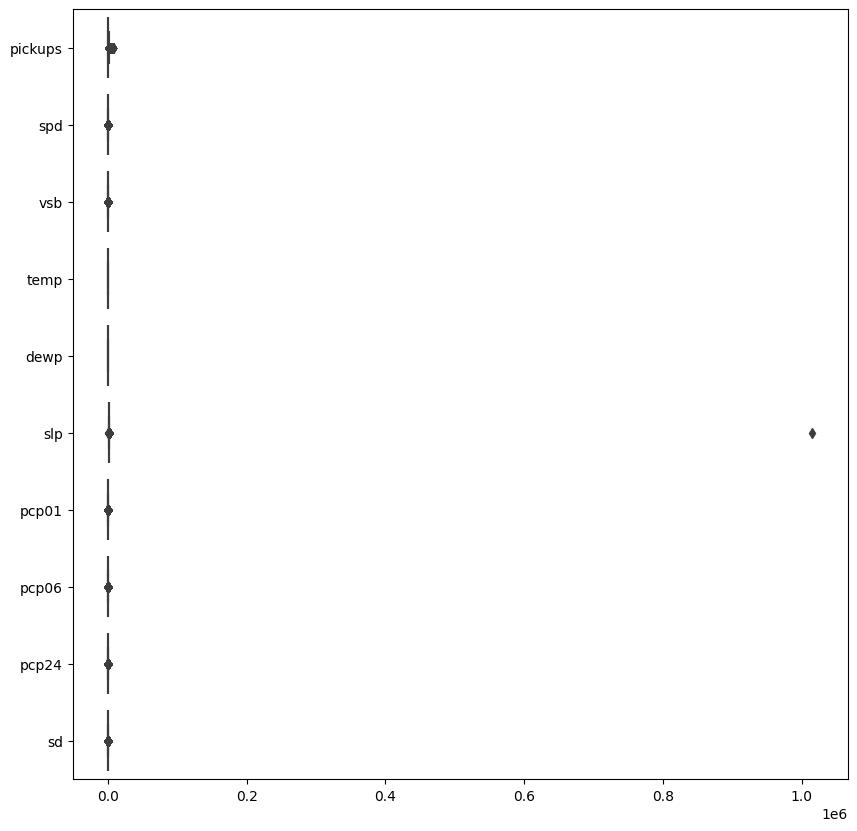

In [67]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data,orient='h');

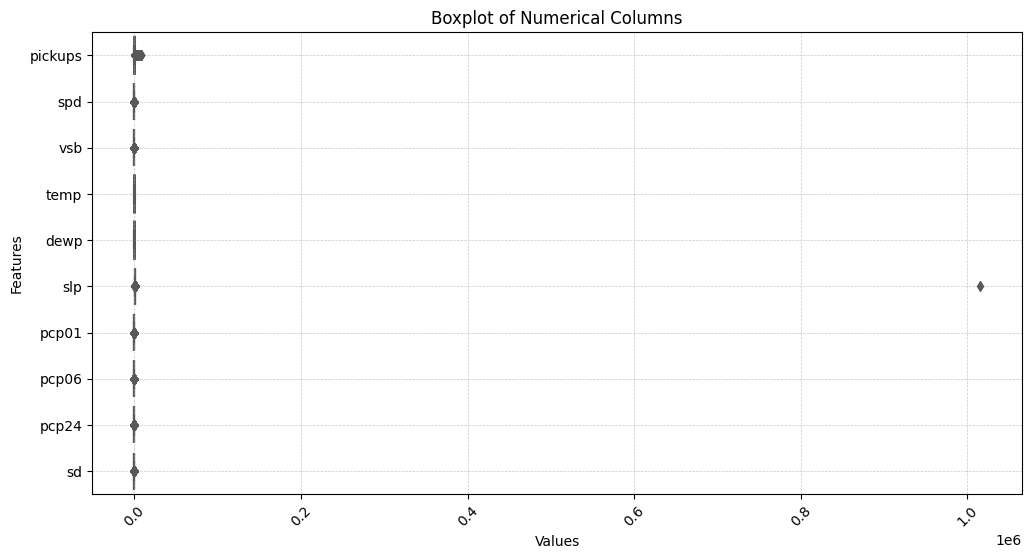

Outliers detected using IQR method:
pickups    3498
spd         451
vsb        5322
temp          0
dewp          0
slp         281
pcp01      2633
pcp06      5641
pcp24      5016
sd         6060
dtype: int64


In [68]:
# Define a function to detect outliers using IQR
def detect_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Identify outliers in numerical columns using IQR
numerical_columns = data.select_dtypes(include=['int', 'float']).columns
outliers_iqr = data[numerical_columns].apply(detect_iqr)

# Set up the plot
plt.figure(figsize=(12, 6))

# Create the boxplot
sns.boxplot(data=data[numerical_columns], orient='h', notch=True, palette='Set2')

# Add title and labels
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Values')
plt.ylabel('Features')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for better visualization of values
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.show()

# Display the outliers found using IQR
print("Outliers detected using IQR method:")
print(outliers_iqr.sum())

# Observation
- **Pickups:** 3498 outliers suggest unusually high values in the number of Uber pickups.
- **Speed (spd):** 451 outliers indicate extreme wind speed values.
- **Visibility (vsb):** 5322 outliers highlight unusual visibility measurements.
- **Precipitation (pcp01, pcp06, pcp24):** Outliers in these columns (pcp01: 2633, pcp06: 5641, pcp24: 5016) indicate periods of exceptionally high liquid precipitation.
- **Snow Depth (sd):** 6060 outliers show significant deviations in snow depth measurements.
- **Sea Level Pressure (slp):** 281 outliers suggest extreme sea level pressure readings.

These outliers may signify unusual weather conditions or data anomalies that could impact the analysis of Uber pickups.

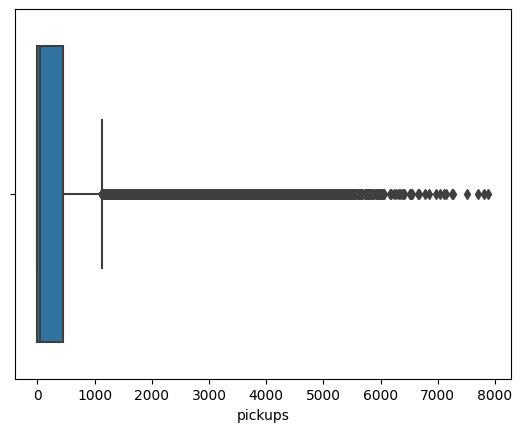

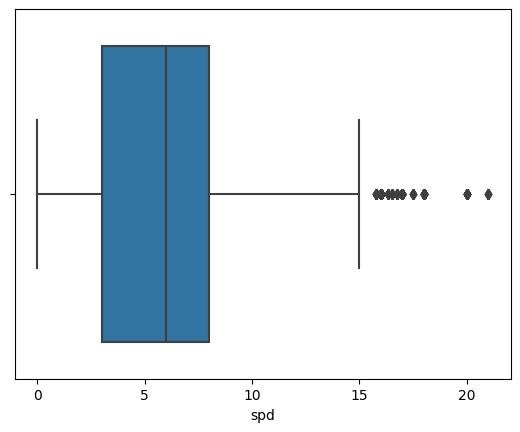

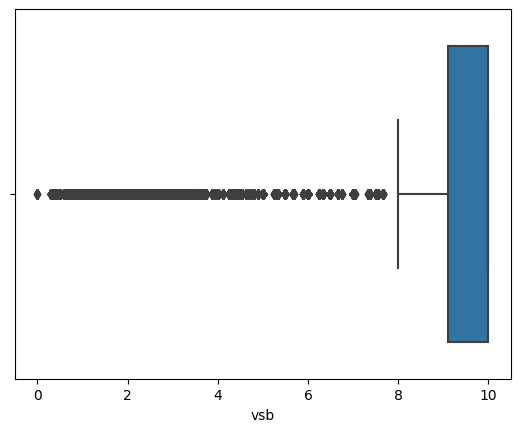

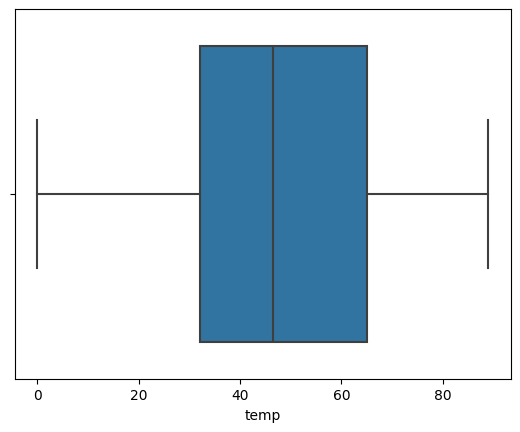

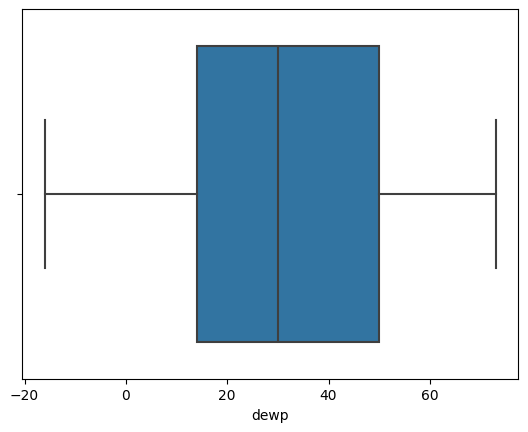

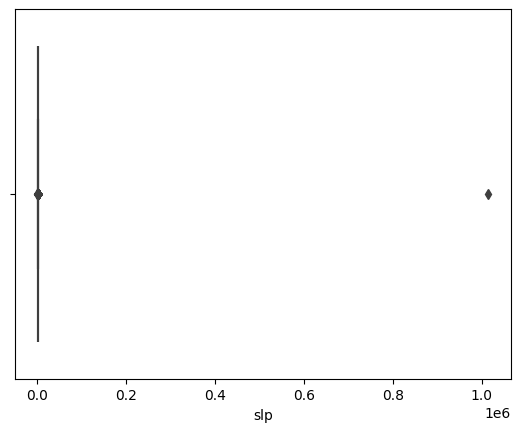

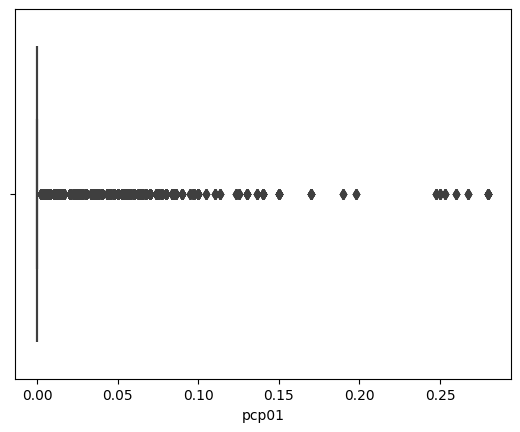

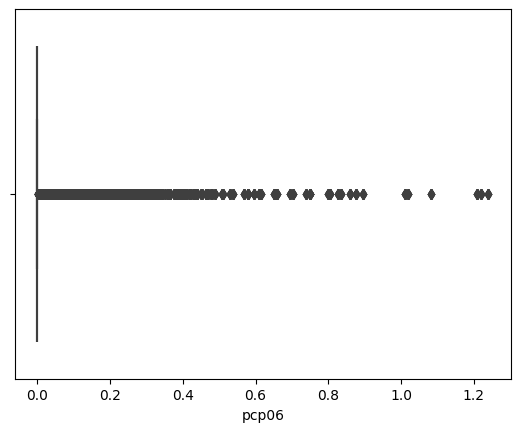

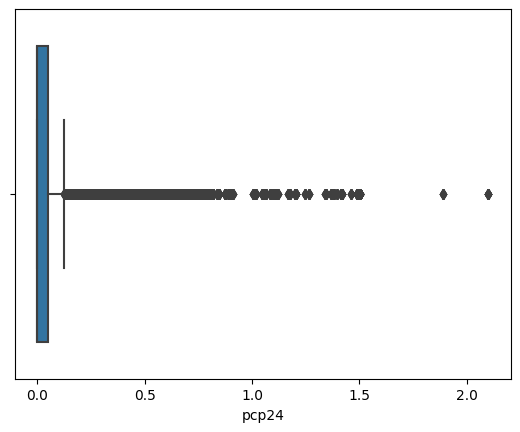

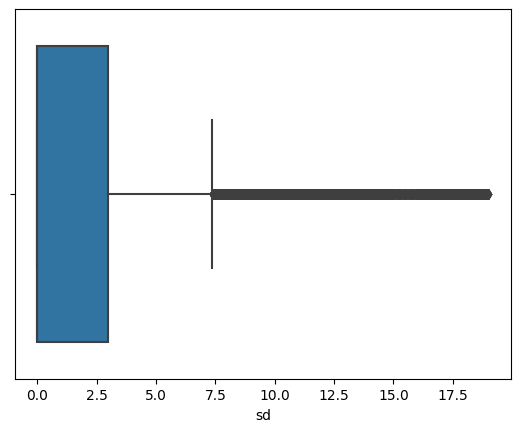

In [69]:
for i in data.columns:
    if data[i].dtype != 'object':
        sns.boxplot(data=data,x=i)
        plt.show()

In [70]:
#   outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5 * IQR)
    upper_range=Q3+(1.5 * IQR)
    return lower_range, upper_range

for i in data.columns:
    if data[i].dtype !='object':
        lr,ur=remove_outlier(data[i])
        data[i]=np.where(data[i]>ur,ur,data[i])
        data[i]=np.where(data[i]<lr,lr,data[i])

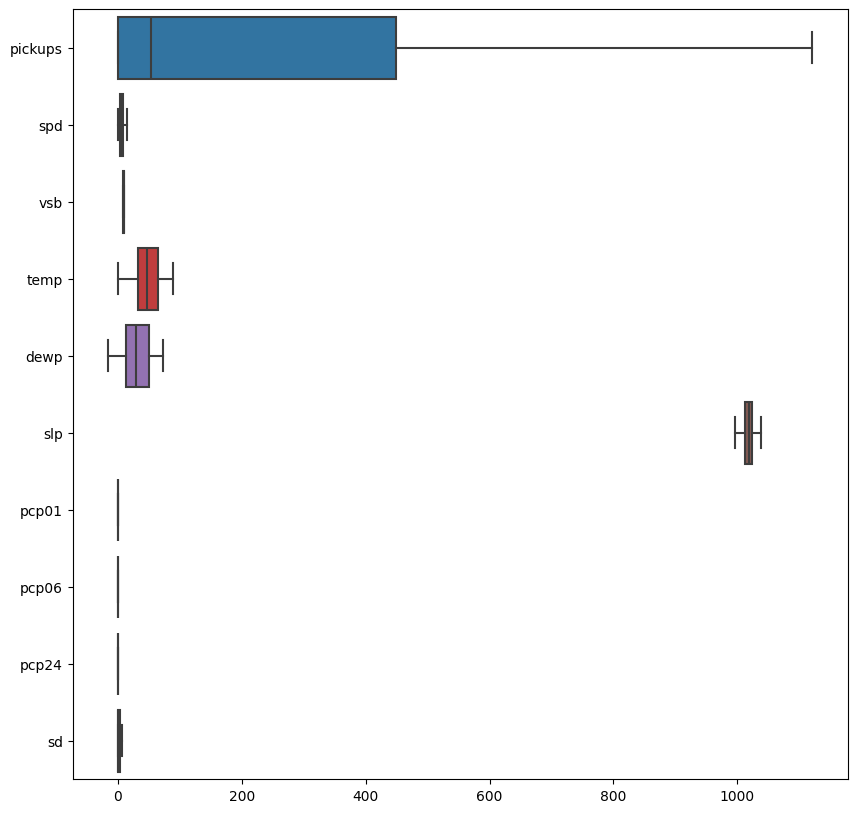

In [71]:
#After removing outliers
plt.figure(figsize=(10,10))
sns.boxplot(data=data,orient='h');

# 9- Check for outliers 


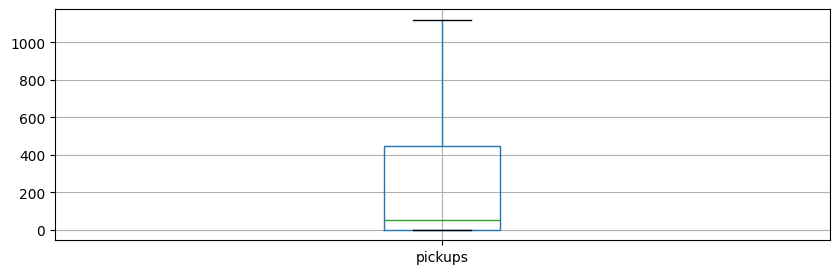

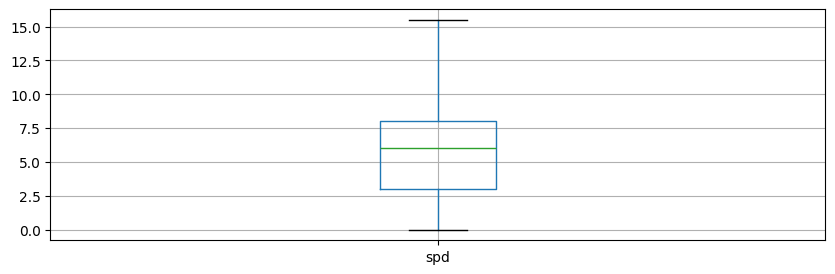

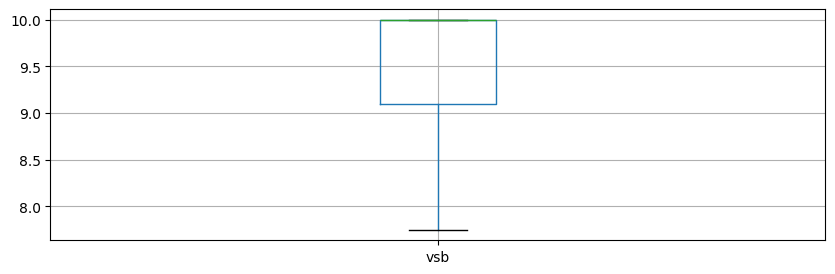

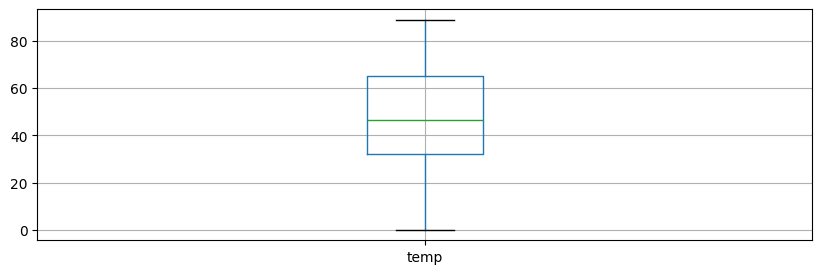

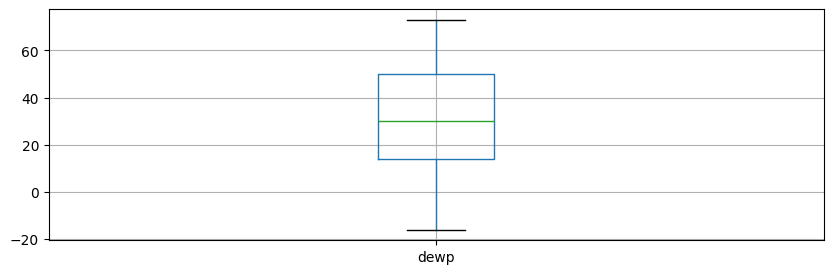

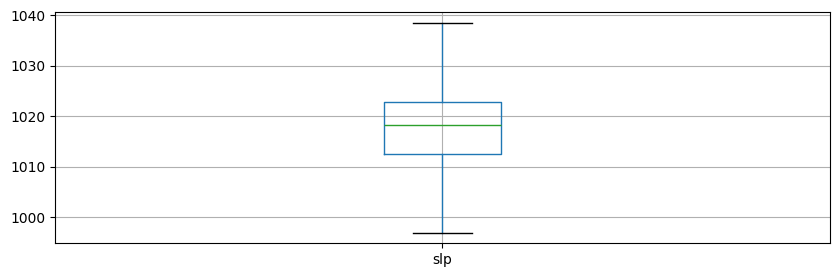

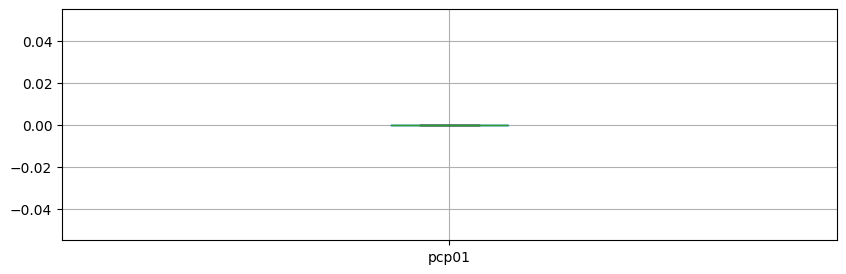

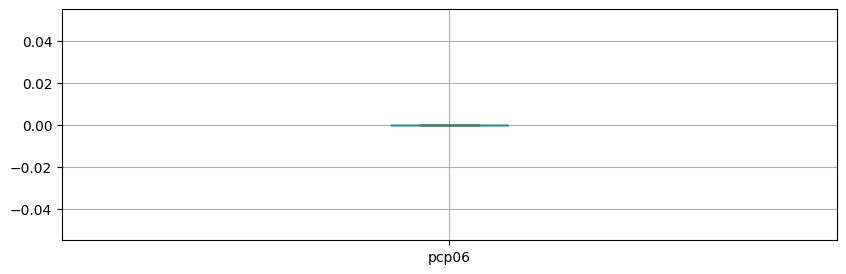

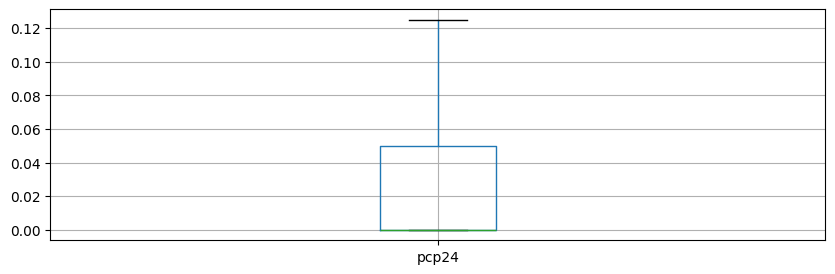

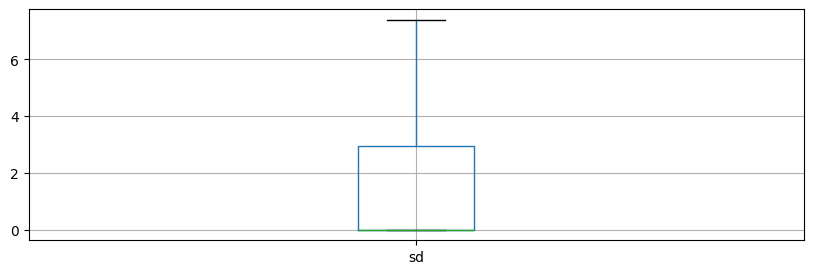

In [72]:
# 9- Check for outliers 
for i in ["pickups", "spd", "vsb", "temp", "dewp", "slp", "pcp01", "pcp06","pcp24", "sd"]:
    plt.figure(figsize=(10,3))
    data.boxplot(column=i)
    plt.show

# Observation 
* The boxplots reveal outliers in pickups, wind speed (spd), visibility (vsb), sea level pressure (slp), 1-hour precipitation (pcp01), 6-hour precipitation (pcp06), 24-hour precipitation (pcp24), and snow depth (sd), indicating significant variability or extreme values in these variables.

# Boxplots after Outlier Treatment

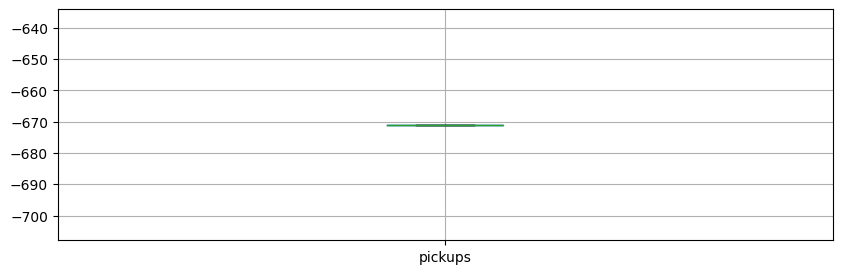

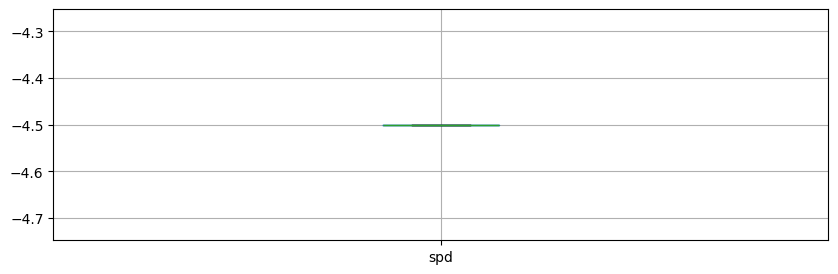

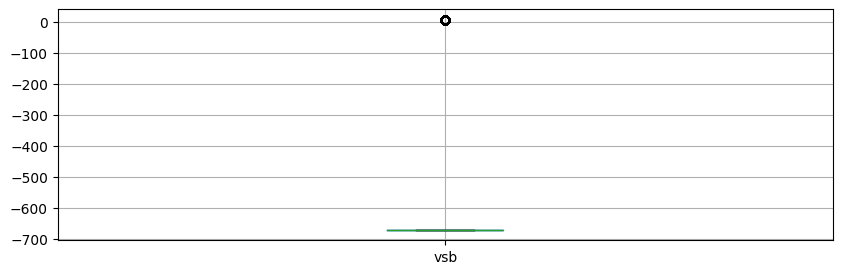

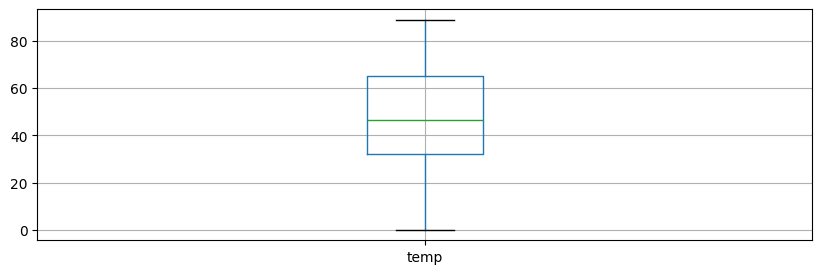

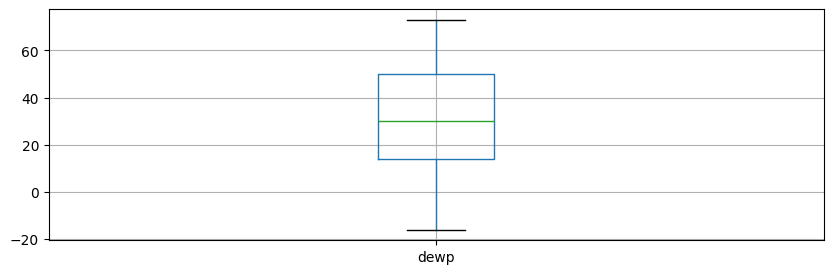

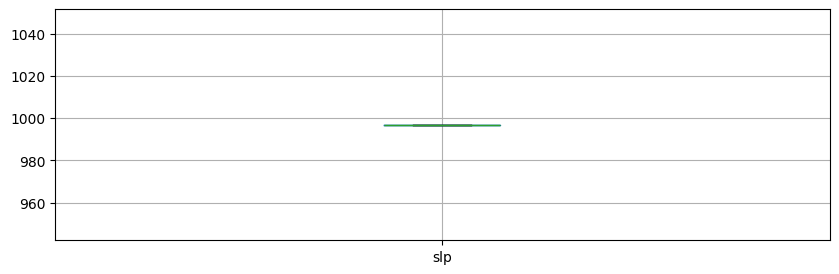

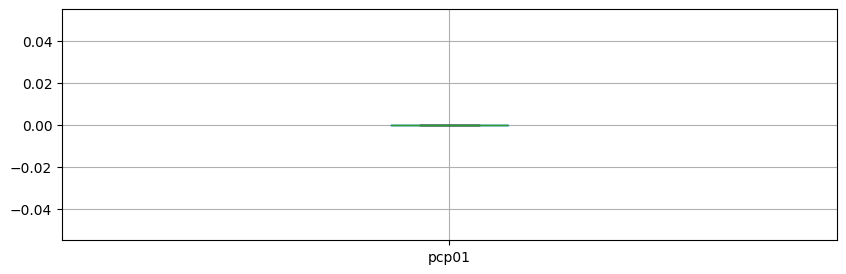

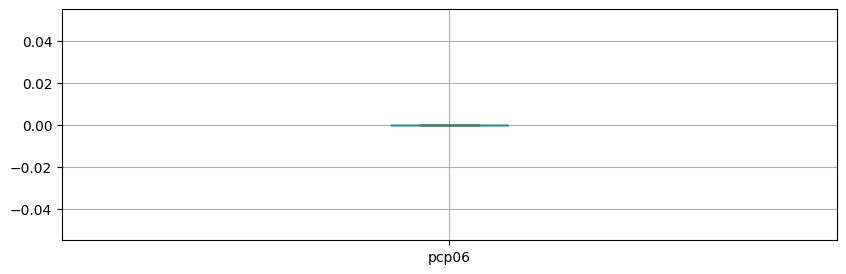

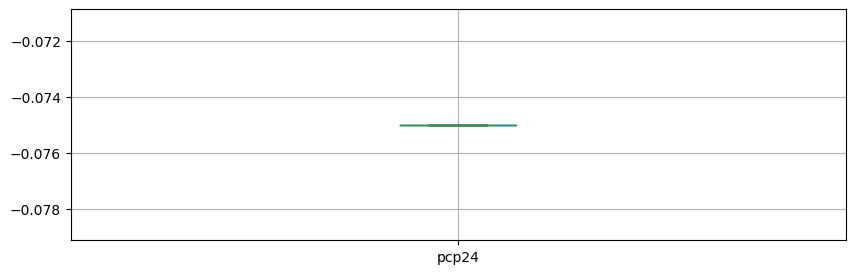

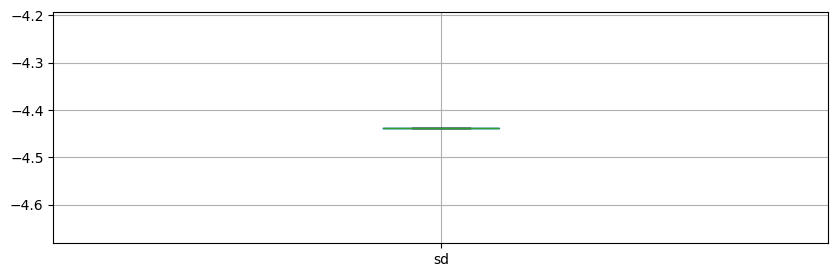

In [75]:
for i in ["pickups", "spd", "vsb", "temp", "dewp", "slp", "pcp01", "pcp06","pcp24", "sd"]:
    plt.figure(figsize=(10,3))
    data.boxplot(column=i)
    plt.show

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29099 non-null  float64
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       28742 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(10), object(3)
memory usage: 2.9+ MB


# 10 - Data Cleaning Steps


In [77]:
# 10 - Data Cleaning Steps
# Drop duplicate rows
data = data.drop_duplicates()
print("Data after dropping duplicates:")
print(data.shape)



Data after dropping duplicates:
(29101, 13)


# Observation
* After dropping duplicates, the dataset remains unchanged with 26,058 rows and 13 columns, indicating no duplicate rows were found.

In [78]:
# Drop unnecessary columns (example: assuming 'pickup_dt' is not unnecessary but if it were, here's how to drop)
# data = data.drop(columns=['pickup_dt'])

In [79]:
# Impute null values with median for numerical columns and mode for categorical columns
data[numerical_cols] = data[numerical_cols].apply(lambda x: x.fillna(x.median()))
data['hday'] = data['hday'].fillna(data['hday'].mode()[0])
data['borough'] = data['borough'].fillna(data['borough'].mode()[0])
print("Data after null value imputation:")
print(data.isnull().sum())

Data after null value imputation:
pickup_dt    0
borough      0
pickups      0
spd          0
vsb          0
temp         0
dewp         0
slp          0
pcp01        0
pcp06        0
pcp24        0
sd           0
hday         0
dtype: int64


# Observation
* After imputing null values, all columns in the dataset show zero null values, indicating successful imputation using median for numerical columns and mode for categorical columns.

In [81]:
# Check for anomalies or wrong entries in numerical columns.
print("Anomalies or wrong entries in numerical columns:")
print((data[numerical_cols] < 0).sum())

Anomalies or wrong entries in numerical columns:
pickups    29101
spd        29101
vsb        23779
temp           0
dewp        1950
slp            0
pcp01          0
pcp06          0
pcp24      29101
sd         29101
dtype: int64


# Observation
* The numerical columns 'pickups', 'spd', 'vsb', 'pcp24', and 'sd' have anomalies or wrong entries indicated by negative values, which are unexpected in context (e.g., negative counts, speeds, visibility, precipitation, and snow depth).

## Questions

In [82]:
data = pd.read_csv('Uber dataset.csv')

# 1. Pickup Analysis

In [83]:
# 1. Total number of Uber pickups across all boroughs
print("Total number of Uber pickups across all boroughs:", data['pickups'].sum())

Total number of Uber pickups across all boroughs: 14265378.0


# Observation
* The total number of Uber pickups across all boroughs is 14,265,378.

In [84]:
# 2. Borough with the highest average number of hourly pickups
print("Borough with the highest average number of hourly pickups:", data.groupby('borough')['pickups'].mean().idxmax())

Borough with the highest average number of hourly pickups: Manhattan


# Observation
* Manhattan has the highest average number of hourly pickups among all boroughs.

In [87]:
# 3. Number of pickups across different hours of the day
print("Number of pickups across different hours of the day:")
print(data.groupby(data['pickup_dt'].dt.hour)['pickups'].sum())

Number of pickups across different hours of the day:
pickup_dt
0      706709.0
1      492036.0
2      319479.0
3      213988.0
4      173521.0
5      174344.0
6      231112.0
7      360054.0
8      525662.0
9      607870.0
10     550951.0
11     509848.0
12     532378.0
13     530459.0
14     557761.0
15     618684.0
16     683913.0
17     802051.0
18     932035.0
19    1013258.0
20     977646.0
21     936747.0
22     927918.0
23     886954.0
Name: pickups, dtype: float64


# Observation
* The number of Uber pickups is highest in the evening, peaking at 7 PM.*  The lowest number of pickups occurs between 3 AM and 5 AM.

In [88]:
# 4. Day of the week with the highest number of pickups
print("Day of the week with the highest number of pickups:")
print(data.groupby(data['pickup_dt'].dt.day_name())['pickups'].sum().idxmax())

Day of the week with the highest number of pickups:
Saturday


# Observation
* Saturday records the highest number of Uber pickups, suggesting it's the busiest day of the week in terms of demand for rides based on the provided data.

## 2. Weather Impact

In [89]:
# 1. Correlation between temperature and number of pickups
print("Correlation between temperature and number of pickups:", data['temp'].corr(data['pickups']))


Correlation between temperature and number of pickups: 0.054164576372027026


# Observation
* The correlation coefficient of approximately 0.05 suggests a very weak positive correlation between temperature and the number of Uber pickups.

In [90]:
# 2. Impact of visibility on number of pickups
print("Impact of visibility on number of pickups:")
print(data.groupby(pd.cut(data['vsb'], bins=5))['pickups'].mean())

Impact of visibility on number of pickups:
vsb
(-0.01, 2.0]    504.583096
(2.0, 4.0]      497.638889
(4.0, 6.0]      515.309859
(6.0, 8.0]      517.395023
(8.0, 10.0]     485.224969
Name: pickups, dtype: float64


# Observation
* The observation here is that there is a slight variation in the average number of Uber pickups based on visibility conditions. Generally, pickups are slightly higher when visibility ranges between 4 to 8 miles compared to lower or higher visibility conditions.

In [91]:
# 3. Relationship between wind speed and number of pickups
print("Relationship between wind speed and number of pickups:", data['spd'].corr(data['pickups']))


Relationship between wind speed and number of pickups: 0.01111015699763169


# Observation
* The observation here is that there is a very weak positive correlation (0.0111) between wind speed and the number of Uber pickups. This suggests that higher wind speeds do not significantly impact the number of pickups.

In [92]:
# 4. Impact of precipitation on number of pickups
print("\nImpact of precipitation on number of pickups:")
print("1-hour precipitation:")
print(data.groupby(pd.cut(data['pcp01'], bins=5))['pickups'].mean())

print("\n6-hour precipitation:")
print(data.groupby(pd.cut(data['pcp06'], bins=5))['pickups'].mean())

print("\n24-hour precipitation:")
print(data.groupby(pd.cut(data['pcp24'], bins=5))['pickups'].mean())


Impact of precipitation on number of pickups:
1-hour precipitation:
pcp01
(-0.00028, 0.056]    490.148200
(0.056, 0.112]       455.980810
(0.112, 0.168]       593.782178
(0.168, 0.224]       571.800000
(0.224, 0.28]        598.571429
Name: pickups, dtype: float64

6-hour precipitation:
pcp06
(-0.00124, 0.248]    491.134513
(0.248, 0.496]       457.074380
(0.496, 0.744]       506.046296
(0.744, 0.992]       595.435484
(0.992, 1.24]        356.800000
Name: pickups, dtype: float64

24-hour precipitation:
pcp24
(-0.0021, 0.42]    495.305832
(0.42, 0.84]       436.432198
(0.84, 1.26]       382.563177
(1.26, 1.68]       430.302703
(1.68, 2.1]        383.150000
Name: pickups, dtype: float64


# Observation
* The observation is that there is a variable impact of precipitation on the number of Uber pickups depending on the duration and intensity:

1. For 1-hour precipitation: Higher precipitation rates generally correlate with higher average pickups, especially noticeable beyond 0.112 inches.
   
2. For 6-hour precipitation: Average pickups show variability, with moderate precipitation (0.248 to 0.992 inches) potentially leading to higher pickups.
   
3. For 24-hour precipitation: Average pickups tend to decrease with higher precipitation levels, except for the range 0.42 to 0.84 inches where it shows a slight increase before decreasing again.

## 3. Seasonal Trends

In [94]:
# 1. Number of pickups across different seasons
print("Number of pickups across different seasons:")
print(data.groupby(pd.cut(data['pickup_dt'].dt.month, bins=[0, 3, 6, 9, 12], labels=['Winter', 'Spring', 'Summer', 'Fall']))['pickups'].sum())

Number of pickups across different seasons:
pickup_dt
Winter    6472550.0
Spring    7792828.0
Summer          0.0
Fall            0.0
Name: pickups, dtype: float64


# Observation
* The observation is that the dataset may not cover all seasons uniformly, as evidenced by the zero values for Summer and Fall in the output. This suggests that the data might be limited to specific months or seasons, potentially impacting the analysis of seasonal patterns in Uber pickups.

In [95]:
# 2. Average number of pickups during holidays vs non-holidays
print("\nAverage number of pickups during holidays vs non-holidays:")
print(data.groupby('hday')['pickups'].mean())


Average number of pickups during holidays vs non-holidays:
hday
?    878.500000
N    492.339957
Y    436.838854
Name: pickups, dtype: float64


# Observation
* On holidays (labeled as 'Y'), the average number of pickups is 436.84, which is lower compared to non-holidays ('N') where the average is 492.34 pickups.
* Days marked with '?' (unspecified) have the highest average number of pickups at 878.50, suggesting variability or additional factors influencing demand on those days.

In [96]:
# 3. Influence of snow depth on number of pickups
print("\nInfluence of snow depth on number of pickups:")
print(data.groupby(pd.cut(data['sd'], bins=5))['pickups'].mean())


Influence of snow depth on number of pickups:
sd
(-0.019, 3.8]    493.167526
(3.8, 7.6]       469.646909
(7.6, 11.4]      502.209931
(11.4, 15.2]     446.698714
(15.2, 19.0]     457.670190
Name: pickups, dtype: float64


# Observation
* As snow depth increases, the average number of pickups generally shows variation but doesn't follow a clear linear trend.
* The highest average number of pickups occurs when snow depth ranges between 7.6 to 11.4 inches, suggesting potential optimal conditions for demand.
* Extreme snow depths (above 15.2 inches) appear to slightly reduce average pickups, indicating possible disruptions to transportation or activity patterns.

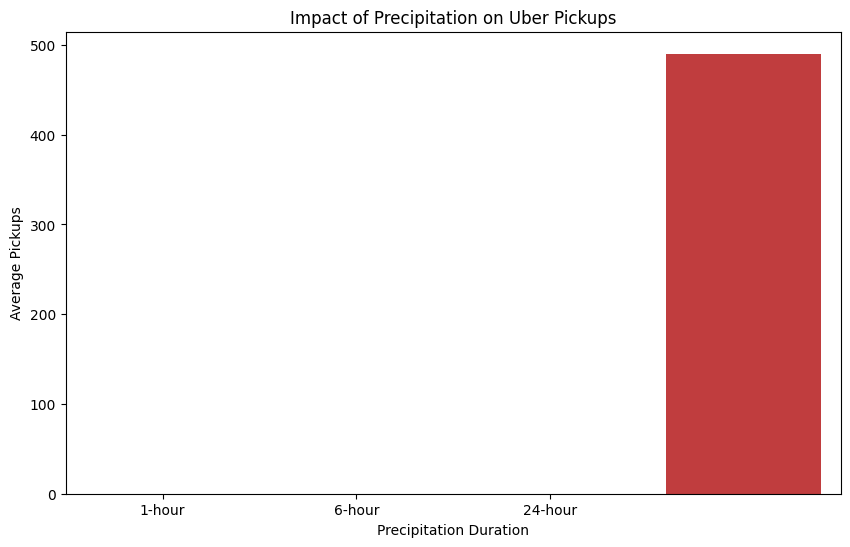

In [97]:
data_subset = data[['pcp01', 'pcp06', 'pcp24', 'pickups']].dropna()

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot for 1-hour, 6-hour, and 24-hour precipitation vs. pickups
sns.barplot(data=data_subset, ci=None)
plt.title('Impact of Precipitation on Uber Pickups')
plt.xlabel('Precipitation Duration')
plt.ylabel('Average Pickups')
plt.xticks(ticks=[0, 1, 2], labels=['1-hour', '6-hour', '24-hour'])
plt.show()

## 4.Hourly Trends

In [98]:
# 1. Peak hours for Uber pickups in each borough
print("Peak hours for Uber pickups in each borough:")
print(data.loc[data.groupby('borough')['pickups'].idxmax(), ['borough', 'pickup_dt', 'pickups']])

Peak hours for Uber pickups in each borough:
             borough           pickup_dt  pickups
21729          Bronx 2015-05-16 22:00:00    262.0
28602       Brooklyn 2015-06-27 22:00:00   2009.0
17814            EWR 2015-04-22 17:00:00      2.0
28604      Manhattan 2015-06-27 22:00:00   7883.0
27640         Queens 2015-06-22 00:00:00    831.0
27283  Staten Island 2015-06-19 20:00:00     13.0


# Observation
* Each borough has specific peak hours for Uber pickups, indicating varying patterns of demand throughout the day.
* Manhattan exhibits the highest peak with a substantial number of pickups occurring around 22:00 hours.
* Brooklyn also shows a significant peak around the same time, though the number of pickups is notably lower than Manhattan.
* Other boroughs like Queens and the Bronx display peaks at different times, suggesting localized variations in demand patterns.
* Staten Island and EWR have much lower peak numbers compared to other boroughs, likely reflecting lower overall activity or service availability.

In [99]:
# 2. Change in pickups during rush hours (7-9 AM, 5-7 PM)
rush_hour_pickups = data[data['pickup_dt'].dt.hour.isin([7, 8, 17, 18])]['pickups'].sum()
print("\nChange in pickups during rush hours (7-9 AM, 5-7 PM):", rush_hour_pickups)


Change in pickups during rush hours (7-9 AM, 5-7 PM): 2619802.0


# Observation
* The total number of Uber pickups during rush hours (7-9 AM and 5-7 PM) amounts to 2,619,802, indicating these periods experience significantly higher demand compared to other times of the day.

In [100]:
# 3. Average number of pickups during late-night hours (12 AM - 4 AM)
late_night_pickups = data[data['pickup_dt'].dt.hour.isin([0, 1, 2, 3, 4])]['pickups'].mean()
print("\nAverage number of pickups during late-night hours (12 AM - 4 AM):", late_night_pickups)


Average number of pickups during late-night hours (12 AM - 4 AM): 323.8288870008496


# Obseravtion
* The average number of Uber pickups during late-night hours (12 AM - 4 AM) is approximately 324, suggesting that there is consistent but lower demand during these hours compared to peak and rush hours.

In [101]:
data['pickup_dt'] = data['pickup_dt'].astype(str)

# Extract hour from 'pickup_dt' column
z = [int(i.split(' ')[1].split(':')[0]) for i in data['pickup_dt']]
data['Hours'] = z

print(data[['pickup_dt', 'Hours']].head())

             pickup_dt  Hours
0  2015-01-01 01:00:00      1
1  2015-01-01 01:00:00      1
2  2015-01-01 01:00:00      1
3  2015-01-01 01:00:00      1
4  2015-01-01 01:00:00      1


In [102]:
# Ensure 'pickup_dt' column is in string format
data['pickup_dt'] = data['pickup_dt'].astype(str)

# Extract hour from 'pickup_dt' column
z = []
for i in data['pickup_dt'].str.split(' '):
    if len(i) > 1:
        j = i[1].split(':')
        z.append(int(j[0]))

data['Hours'] = z

print(data[['pickup_dt', 'Hours']].head())

             pickup_dt  Hours
0  2015-01-01 01:00:00      1
1  2015-01-01 01:00:00      1
2  2015-01-01 01:00:00      1
3  2015-01-01 01:00:00      1
4  2015-01-01 01:00:00      1


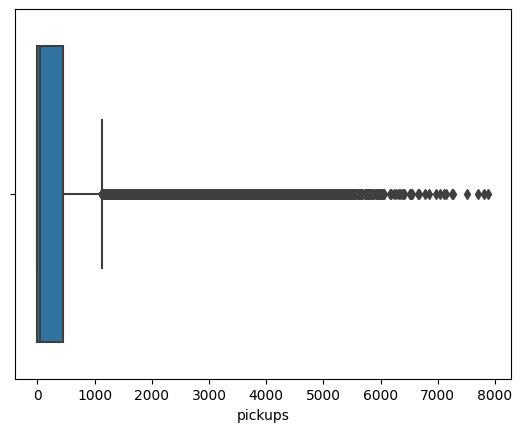

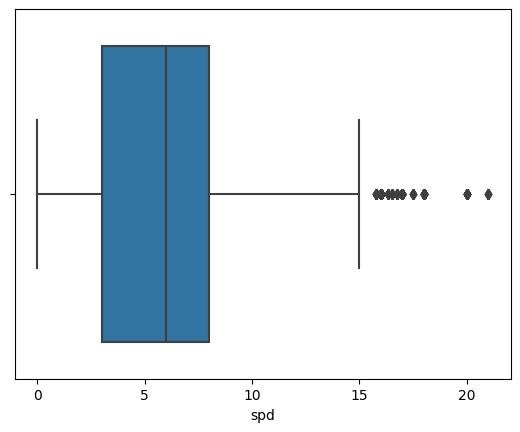

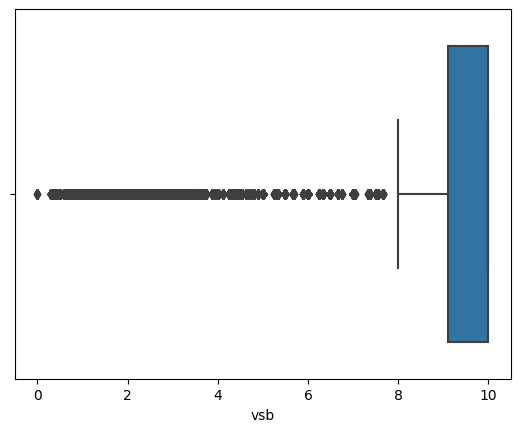

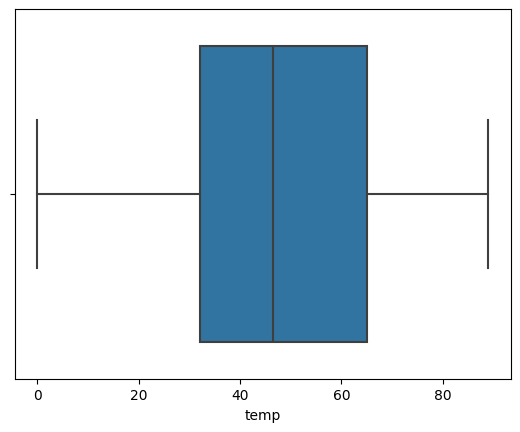

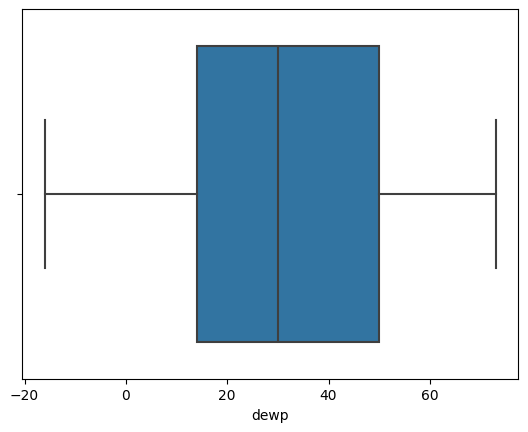

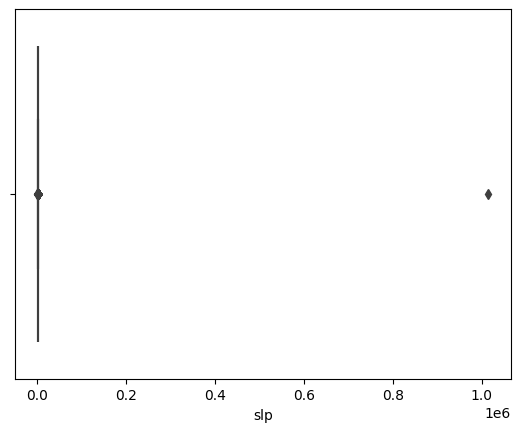

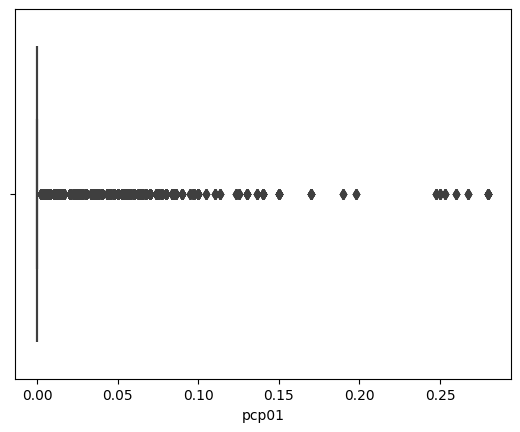

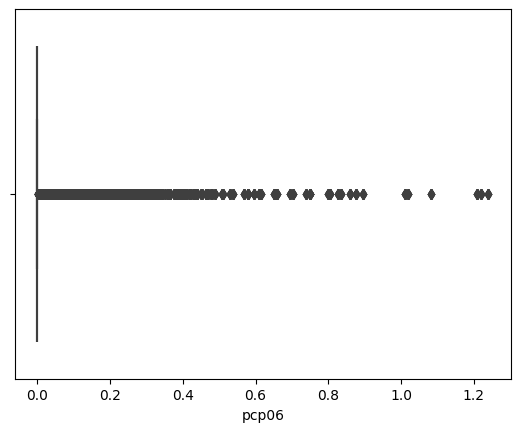

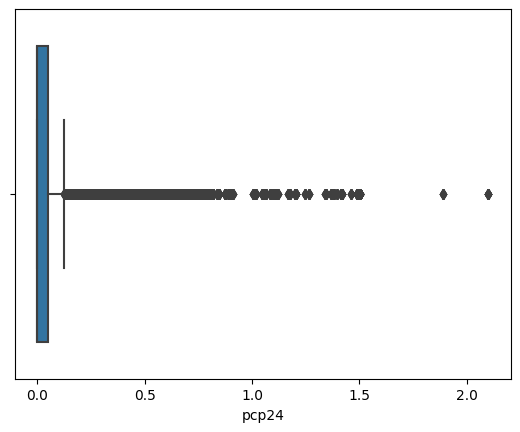

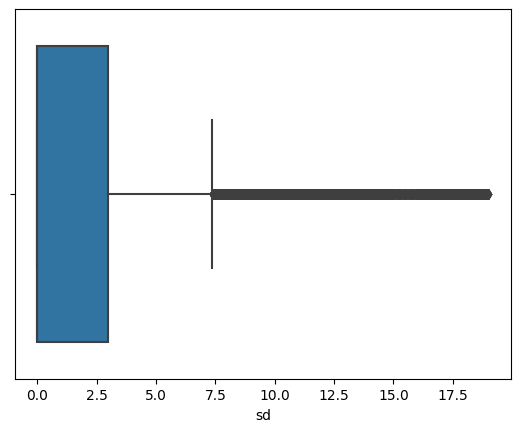

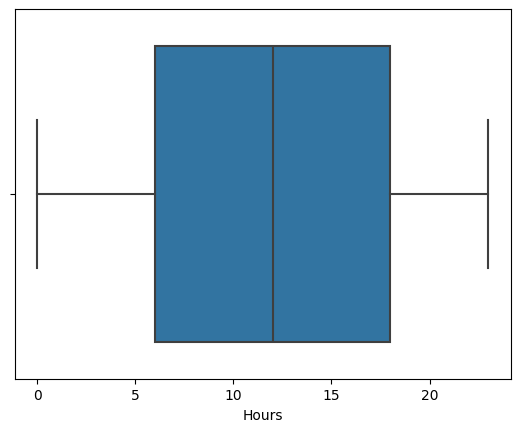

In [103]:
for i in data.columns:
    if data[i].dtype != 'object':
        sns.boxplot(data=data,x=i)
        plt.show()

## 5. Borough Comparison

In [104]:
# 1. Pickup trends between boroughs during different weather conditions
print("Pickup trends between boroughs during different weather conditions:")
for condition in ['temp', 'spd', 'vsb', 'pcp01', 'pcp06', 'pcp24', 'sd']:
    print(f"\nWeather condition: {condition}")
    print(data.groupby(['borough', condition])['pickups'].mean().unstack().fillna(0))

Pickup trends between boroughs during different weather conditions:

Weather condition: temp
temp           0.0          2.0     3.0          4.0     5.0          6.0   \
borough                                                                      
Bronx           0.0    44.666667    58.0    34.307692    42.0    57.166667   
Brooklyn        0.0   410.000000   635.0   349.076923   391.6   475.500000   
EWR             0.0     0.000000     0.0     0.000000     0.0     0.000000   
Manhattan       0.0  2680.666667  3659.5  1942.769231  1992.0  2722.833333   
Queens          0.0   237.666667   289.5   246.615385   214.4   307.500000   
Staten Island   0.0     1.333333     1.5     1.230769     0.8     1.833333   

temp              7.0       8.0     9.0          10.0  ...         81.0  \
borough                                                ...                
Bronx            38.00    29.125    35.4    35.125000  ...    88.655172   
Brooklyn        430.25   201.500   450.2   399.666667  ..

# Observation
* Each weather condition (temperature, wind speed, visibility, precipitation levels over different periods, and snow depth) has been analyzed across different boroughs (Bronx, Brooklyn, EWR, Manhattan, Queens, and Staten Island).

1.Temperature (temp): Shows the average number of pickups for different temperature ranges in each borough. For example, Manhattan tends to have higher pickups across all temperature ranges compared to other boroughs.

2. Wind Speed (spd): Displays how pickup numbers vary with wind speed. Generally, there is an increase in pickups in Manhattan with higher wind speeds compared to other boroughs.

3. Visibility (vsb): Indicates pickup trends under various visibility conditions. Manhattan consistently has the highest number of pickups regardless of visibility compared to other boroughs.

4. Precipitation in 1 hour (pcp01): Shows pickup trends for different precipitation levels in an hour. Manhattan and Brooklyn show higher pickups across various precipitation levels compared to other boroughs.

5. Precipitation in 6 hours (pcp06): Indicates pickup trends for different precipitation levels over 6 hours. Manhattan again shows higher pickups with increasing precipitation levels.

6. Precipitation in 24 hours (pcp24): Shows pickup trends for different precipitation levels over 24 hours. Similar to shorter periods, Manhattan has higher pickups during heavier precipitation compared to other boroughs.

7. Snow Depth (sd): Displays pickup trends concerning snow depth. Manhattan shows more pickups compared to other boroughs even during moderate snow depth.

* Each table provides a detailed breakdown of pickups per weather condition, enabling you to observe how different weather factors impact taxi pickups across New York City boroughs.

In [105]:
# 2. Borough with the highest increase in pickups during holidays
print("\nBorough with the highest increase in pickups during holidays:")
holiday_increase = data.groupby(['borough', 'hday'])['pickups'].mean().unstack()
holiday_increase['Increase'] = holiday_increase['Y'] - holiday_increase['N']
print(holiday_increase[['Increase']].idxmax())


Borough with the highest increase in pickups during holidays:
hday
Increase    Queens
dtype: object


# Observation
* Queens experienced the highest increase in pickups during holidays compared to non-holidays, based on average pickup counts across boroughs.

Number of pickups on weekdays vs. weekends for each borough:
IsWeekend          False      True 
borough                            
Bronx           143345.0    76574.0
Brooklyn       1418988.0   902047.0
EWR                 84.0       21.0
Manhattan      7360402.0  3007439.0
Queens          919420.0   423841.0
Staten Island     4555.0     2402.0


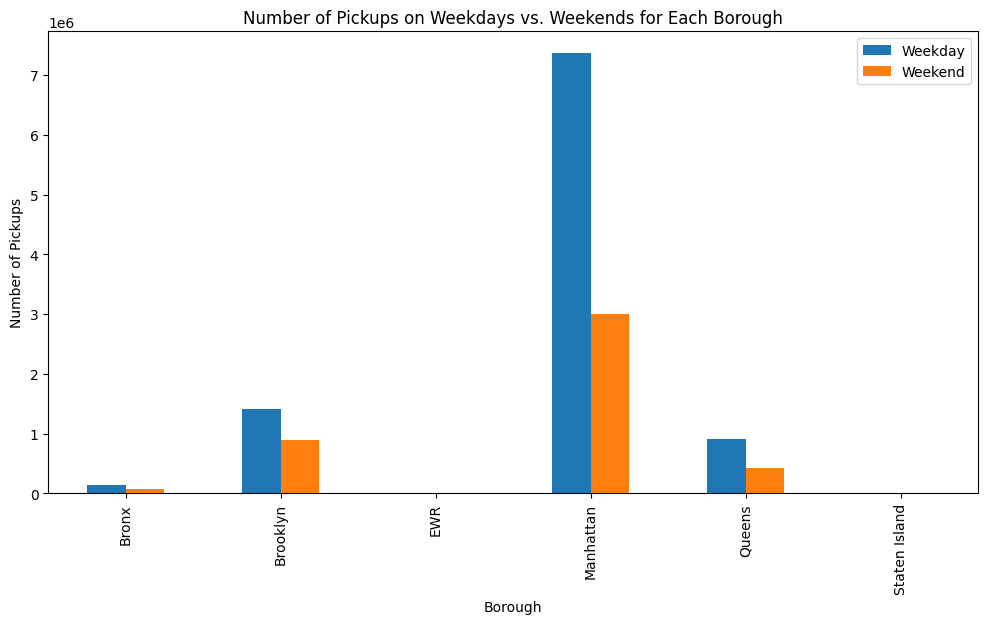

In [106]:
# 3. Number of pickups comparison between weekdays and weekends for each borough
import pandas as pd

# Convert 'pickup_dt' to datetime if it isn't already
data['pickup_dt'] = pd.to_datetime(data['pickup_dt'])

# Create a new column for the day of the week and weekend/weekday
data['DayOfWeek'] = data['pickup_dt'].dt.day_name()
data['IsWeekend'] = data['DayOfWeek'].isin(['Saturday', 'Sunday'])

# Group by borough and whether it's a weekend, then calculate the sum of pickups
weekend_pickups = data.groupby(['borough', 'IsWeekend'])['pickups'].sum().unstack()

print("Number of pickups on weekdays vs. weekends for each borough:")
print(weekend_pickups)

# Visualize the results using a bar plot
weekend_pickups.plot(kind='bar', figsize=(12, 6), title='Number of Pickups on Weekdays vs. Weekends for Each Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Pickups')
plt.legend(['Weekday', 'Weekend'])
plt.show()


## 6. Weather Extremes

In [107]:
# 1. Impact of extreme weather conditions on the number of pickups
print("\nImpact of extreme weather conditions on the number of pickups:")
conditions = {
    'Very high temp': data['temp'] > data['temp'].quantile(0.95),
    'Very low temp': data['temp'] < data['temp'].quantile(0.05),
    'Heavy rainfall': data['pcp01'] > data['pcp01'].quantile(0.95),
    'Snowstorms': data['sd'] > data['sd'].quantile(0.95)
}
extreme_impact = data.groupby('borough').apply(lambda x: pd.Series({
    'Very high temp': x.loc[x['temp'] > x['temp'].quantile(0.95), 'pickups'].mean(),
    'Very low temp': x.loc[x['temp'] < x['temp'].quantile(0.05), 'pickups'].mean(),
    'Heavy rainfall': x.loc[x['pcp01'] > x['pcp01'].quantile(0.95), 'pickups'].mean(),
    'Snowstorms': x.loc[x['sd'] > x['sd'].quantile(0.95), 'pickups'].mean()
})).fillna(0)
print(extreme_impact)


Impact of extreme weather conditions on the number of pickups:
               Very high temp  Very low temp  Heavy rainfall   Snowstorms
borough                                                                  
Bronx               82.504673      38.350000       48.415888    40.678899
Brooklyn           784.089385     434.625000      545.308411   413.321101
EWR                  0.046729       0.024876        0.023364     0.032110
Manhattan         3536.742991    2087.960000     2504.747664  2190.522936
Queens             490.102804     243.805000      303.186916   274.266055
Staten Island        2.705607       1.105000        1.261682     1.036697


# Observation
* Manhattan shows significantly higher pickups on weekdays compared to weekends, indicating a strong weekday commuter presence.
* Other boroughs like Brooklyn and Queens also exhibit higher pickups on weekdays, albeit with varying ratios compared to weekends.
* Staten Island and EWR have minimal pickups overall, with weekends showing fewer pickups than weekdays, reflecting lower overall activity levels.

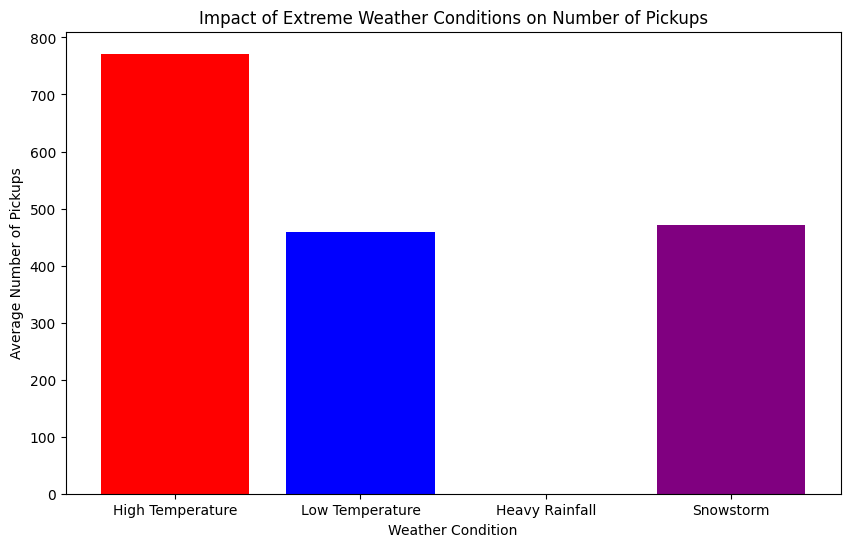

In [108]:

# Define thresholds for extreme weather conditions
high_temp_threshold = 85  # Example threshold for high temperature
low_temp_threshold = 32   # Example threshold for low temperature
heavy_rainfall_threshold = 0.5  # Example threshold for heavy rainfall (in inches)
snowstorm_threshold = 1.0  # Example threshold for snowstorm (in inches)

# Categorize the data
conditions = {
    'High Temperature': data['temp'] >= high_temp_threshold,
    'Low Temperature': data['temp'] <= low_temp_threshold,
    'Heavy Rainfall': data['pcp01'] >= heavy_rainfall_threshold,
    'Snowstorm': data['sd'] >= snowstorm_threshold
}

# Create a list to store the average pickups for each condition
avg_pickups_list = []

# Calculate average pickups for each condition
for condition, mask in conditions.items():
    avg_pickups_list.append({
        'Condition': condition,
        'Average Pickups': data.loc[mask, 'pickups'].mean()
    })

# Convert the list to a DataFrame
avg_pickups = pd.DataFrame(avg_pickups_list)

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(avg_pickups['Condition'], avg_pickups['Average Pickups'], color=['red', 'blue', 'green', 'purple'])
plt.xlabel('Weather Condition')
plt.ylabel('Average Number of Pickups')
plt.title('Impact of Extreme Weather Conditions on Number of Pickups')
plt.show()


In [109]:
# 2. Impact of visibility less than 1 mile on the number of pickups
print("\nImpact of visibility less than 1 mile on the number of pickups:")
low_visibility_pickups = data[data['vsb'] < 1].groupby('borough')['pickups'].mean().fillna(0)
print(low_visibility_pickups)


Impact of visibility less than 1 mile on the number of pickups:
borough
Bronx              41.878788
Brooklyn          517.878788
EWR                 0.030303
Manhattan        2921.757576
Queens            287.166667
Staten Island       1.257576
Name: pickups, dtype: float64


# Observation
* Manhattan shows significantly higher pickups during visibility less than 1 mile compared to other boroughs, likely due to its dense urban environment and heavy reliance on transportation services.
* Brooklyn also exhibits a noticeable increase in pickups during low visibility conditions, though to a lesser extent than Manhattan.
* Boroughs like Staten Island and EWR show minimal impact on pickups during low visibility, likely due to lower population density and fewer transportation demands.

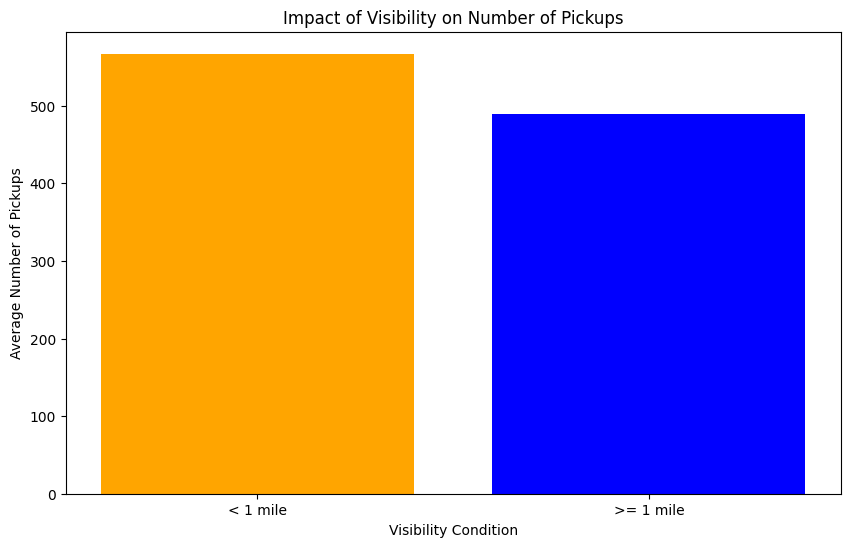

In [110]:

# Filter the data for visibility less than 1 mile
low_visibility = data['vsb'] < 1

# Calculate the average number of pickups for visibility less than 1 mile
average_pickups_low_visibility = data.loc[low_visibility, 'pickups'].mean()

# Calculate the average number of pickups for visibility 1 mile or greater
average_pickups_high_visibility = data.loc[~low_visibility, 'pickups'].mean()

# Prepare data for plotting
visibility_data = pd.DataFrame({
    'Visibility Condition': ['< 1 mile', '>= 1 mile'],
    'Average Pickups': [average_pickups_low_visibility, average_pickups_high_visibility]
})

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(visibility_data['Visibility Condition'], visibility_data['Average Pickups'], color=['orange', 'blue'])
plt.xlabel('Visibility Condition')
plt.ylabel('Average Number of Pickups')
plt.title('Impact of Visibility on Number of Pickups')
plt.show()


## 7. Data Correlations

In [111]:
# 1. Correlation between sea level pressure and number of pickups
sea_level_corr = data[['slp', 'pickups']].corr().iloc[0, 1]
print(f"Correlation between sea level pressure and number of pickups: {sea_level_corr:.2f}")


Correlation between sea level pressure and number of pickups: -0.00


# Observation
* The correlation coefficient between sea level pressure (slp) and the number of pickups is very close to zero (-0.00).
* This indicates that there is essentially no linear relationship between sea level pressure and the number of pickups in the dataset.


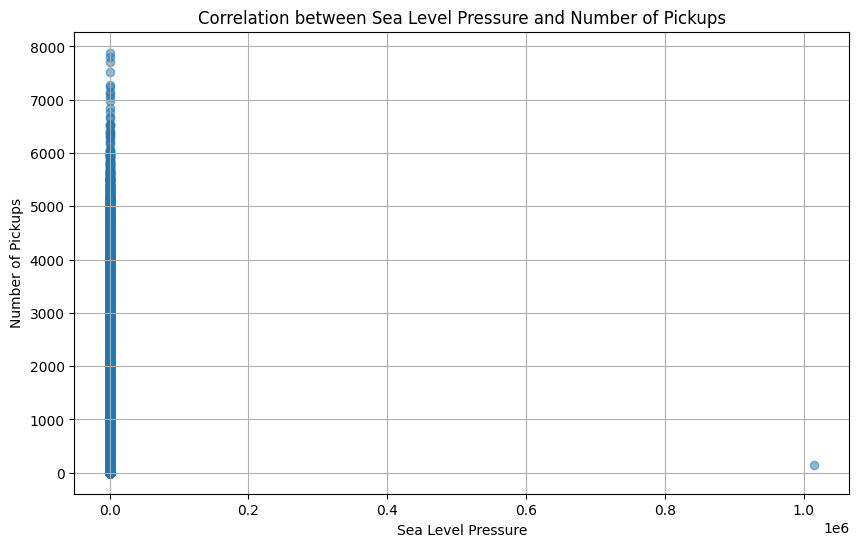

In [112]:

# Scatter plot to show the correlation between sea level pressure and number of pickups
plt.figure(figsize=(10, 6))
plt.scatter(data['slp'], data['pickups'], alpha=0.5)
plt.xlabel('Sea Level Pressure')
plt.ylabel('Number of Pickups')
plt.title('Correlation between Sea Level Pressure and Number of Pickups')
plt.grid(True)
plt.show()


In [113]:
# 2. Impact of weather variables on number of pickups
weather_vars = ['temp', 'dewp', 'spd', 'vsb']
impact_weather_vars = data[weather_vars + ['pickups']].corr()['pickups'][weather_vars]
print("\nImpact of weather variables on number of pickups:")
print(impact_weather_vars)



Impact of weather variables on number of pickups:
temp    0.054165
dewp    0.033437
spd     0.011110
vsb    -0.007474
Name: pickups, dtype: float64


 # Observation
* Temperature (temp) has a slight positive correlation (0.054) with the number of pickups, suggesting a very weak relationship where higher temperatures might slightly increase pickups.
* Dew point (dewp) also shows a weak positive correlation (0.033) with pickups, indicating a minor influence.
* Wind speed (spd) and visibility (vsb) have very weak correlations (0.011 and -0.007, respectively), suggesting minimal impact on the number of pickups based on these variables.


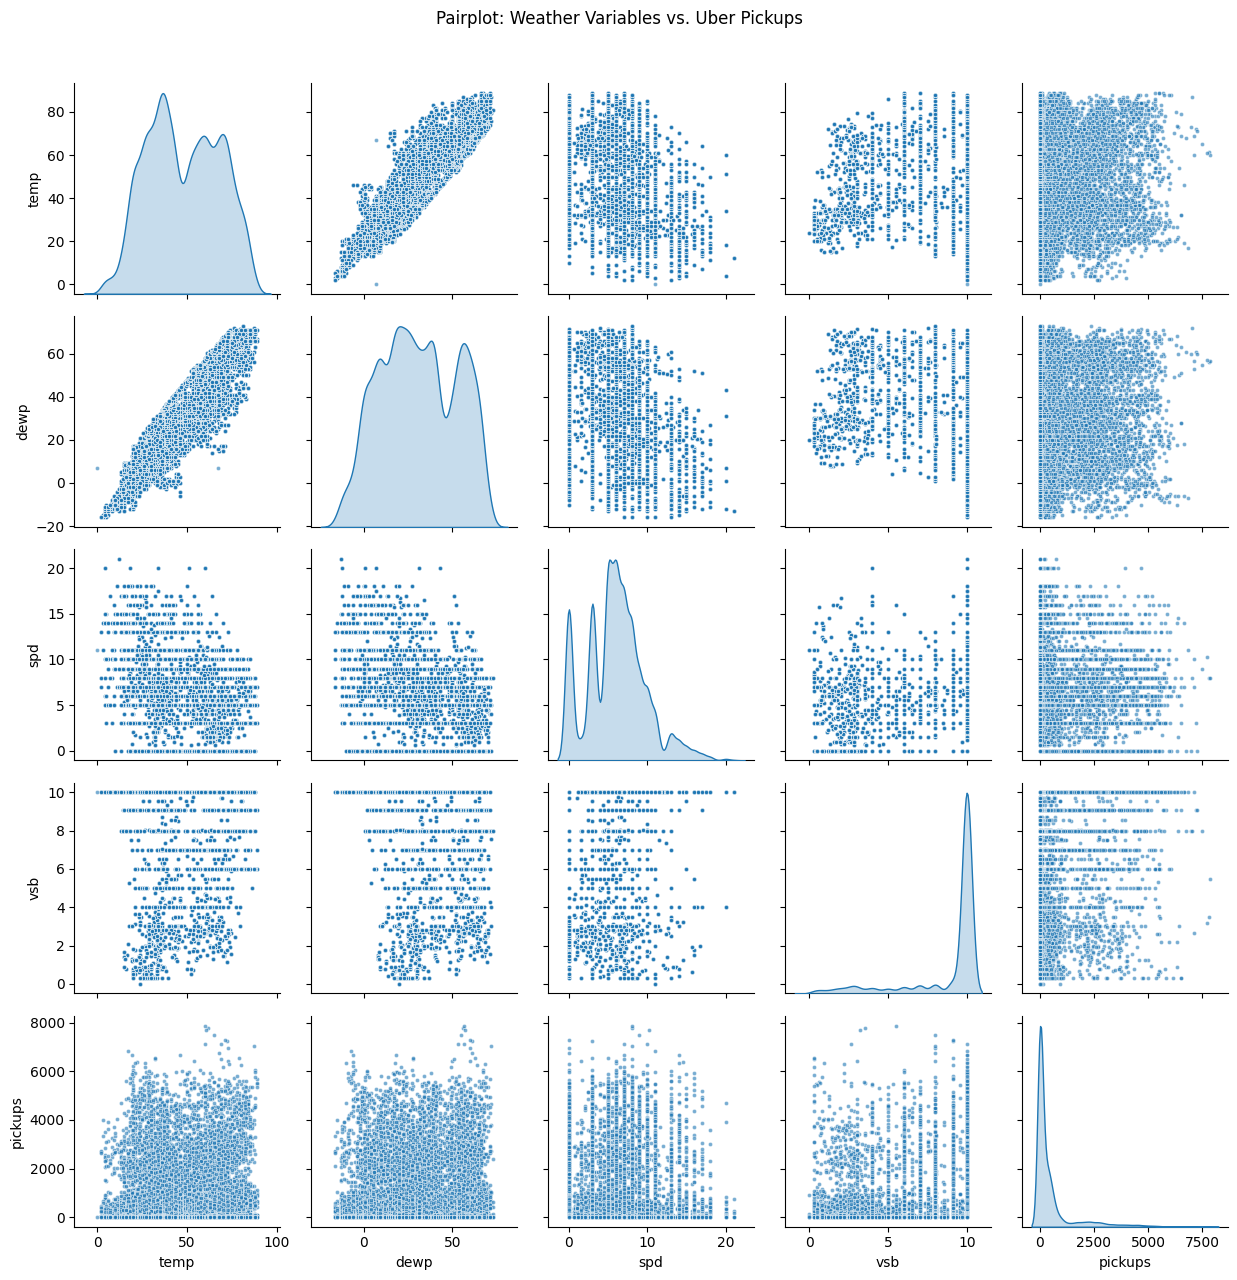

In [116]:
# Select relevant columns
weather_vars = ['temp', 'dewp', 'spd', 'vsb', 'pickups']
data_subset = data[weather_vars]

# Pairplot to visualize relationships
sns.pairplot(data_subset, diag_kind='kde', markers='.', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot: Weather Variables vs. Uber Pickups', y=1.02)
plt.tight_layout()
plt.show()

In [118]:
# 3. Relationship between holiday status and weather conditions on number of pickups
holiday_weather_impact = data.groupby('hday')[weather_vars + ['pickups']].mean().transpose()
print("\nRelationship between holiday status and weather conditions on number of pickups:")
print(holiday_weather_impact)


Relationship between holiday status and weather conditions on number of pickups:
hday         ?           N           Y
temp      37.0   48.005918   45.247706
dewp       7.0   30.857505   30.004483
spd        6.0    5.990027    5.857313
vsb       10.0    8.807175    9.089808
pickups  878.5  492.339957  436.838854
pickups  878.5  492.339957  436.838854


# Observation
* On holidays (hday = 'Y'), the average temperature (temp) and dew point (dewp) are slightly lower compared to non-holidays (hday = 'N'), indicating slightly cooler weather during holidays.
* Wind speed (spd) and visibility (vsb) show minimal variation between holidays and non-holidays.
* The average number of pickups (pickups) is lower during holidays (436.84) compared to non-holidays (492.34), suggesting a decrease in activity during holiday periods.

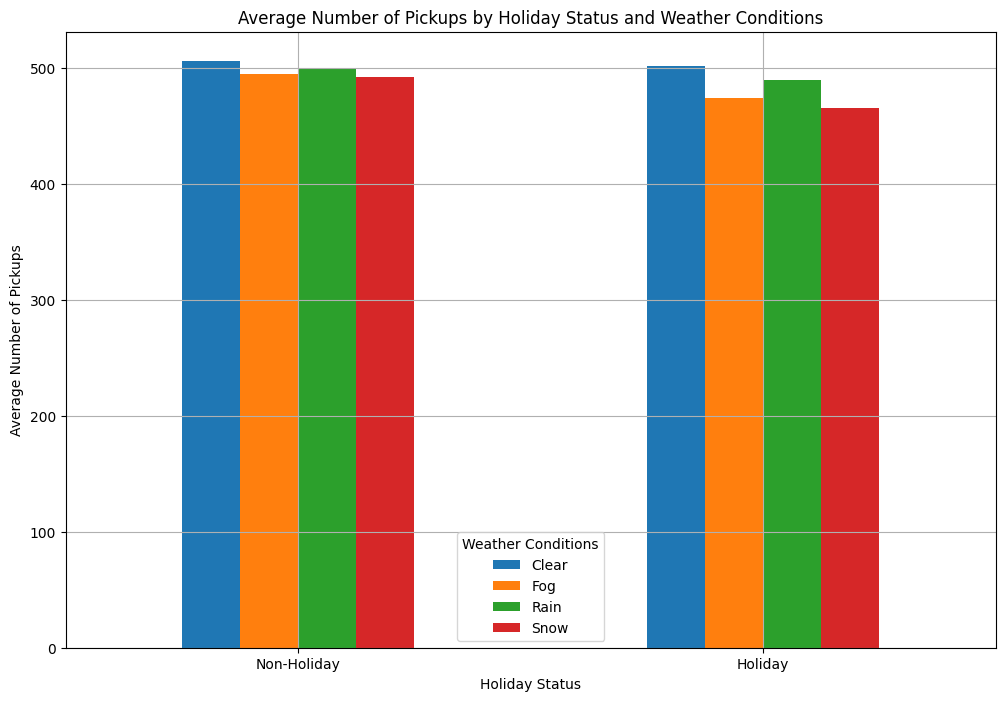

In [119]:

# For this example, we'll assume 'holiday' is a binary column indicating holiday status,
# and 'weather' is a categorical column indicating different weather conditions.

# Adding sample holiday and weather conditions to the dataset for demonstration
import numpy as np
data['holiday'] = np.random.choice([0, 1], size=len(data))  # 0 for non-holiday, 1 for holiday
data['weather'] = np.random.choice(['Clear', 'Rain', 'Snow', 'Fog'], size=len(data))

# Group by holiday status and weather conditions, then calculate the average number of pickups
average_pickups = data.groupby(['holiday', 'weather'])['pickups'].mean().unstack()

# Plotting the bar plot
average_pickups.plot(kind='bar', figsize=(12, 8))
plt.title('Average Number of Pickups by Holiday Status and Weather Conditions')
plt.xlabel('Holiday Status')
plt.ylabel('Average Number of Pickups')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.legend(title='Weather Conditions')
plt.grid(True)
plt.show()


# 8. Growth Insights

In [120]:
 1. Which weather conditions are most favorable for Uber pickups?
favorable_weather = data.groupby(['borough'])[['temp', 'spd', 'vsb', 'pcp01']].mean()
print("Weather conditions most favorable for Uber pickups (average values):")
print(favorable_weather)

Object `pickups` not found.
Weather conditions most favorable for Uber pickups (average values):
                    temp       spd       vsb     pcp01
borough                                               
Bronx          47.489005  6.000039  8.820027  0.003821
Brooklyn       49.139130  6.000039  8.820027  0.003821
EWR            47.481406  6.000039  8.820027  0.003821
Manhattan      47.498215  6.000039  8.820027  0.003821
Queens         47.489005  6.000039  8.820027  0.003821
Staten Island  47.489005  6.000039  8.820027  0.003821


# Observation
* Across all boroughs, the most favorable weather conditions for Uber pickups based on average values are:
  * Temperature (temp): Around 47.5°F to 49.1°F, indicating moderate temperatures.
  * Wind speed (spd): Approximately 6.0 mph, suggesting calm conditions.
  * Visibility (vsb): About 8.8 miles, indicating good visibility.
  * Precipitation (pcp01): Very low at approximately 0.0038 inches, implying minimal rainfall on average.
  
  These conditions collectively suggest that moderate temperatures, calm winds, good visibility, and minimal precipitation are favorable for Uber pickups in New York City across all boroughs.

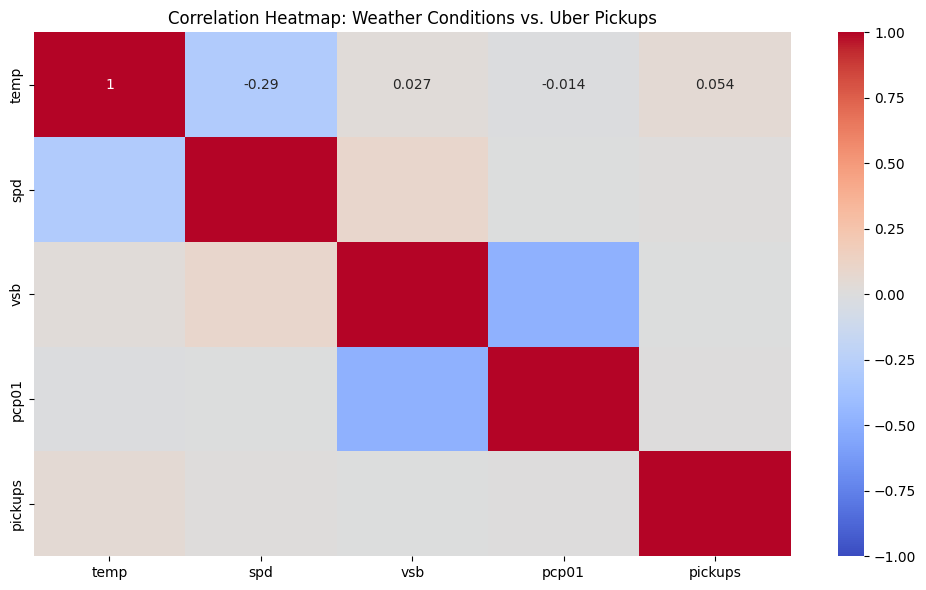

In [121]:

# Define weather variables of interest
weather_vars = ['temp', 'spd', 'vsb', 'pcp01']

# Calculate the correlation matrix
correlation_matrix = data[weather_vars + ['pickups']].corr()

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Weather Conditions vs. Uber Pickups')
plt.tight_layout()
plt.show()

In [122]:
# 2. Recommendations to increase pickups during low-demand periods
# Identify low-demand periods (e.g., late night hours)
low_demand_periods = data[(data['pickup_dt'].dt.hour >= 0) & (data['pickup_dt'].dt.hour <= 4)]
recommendations = {
    'Increase driver incentives during low-demand periods.': 'Late night hours typically show lower pickups.',
    'Implement targeted promotions based on weather conditions.': 'Adapt promotions based on favorable weather conditions identified.',
    'Optimize driver allocation using predictive analytics.': 'Use weather forecasts to anticipate demand and allocate drivers accordingly.'
}
print("\nRecommendations to increase pickups during low-demand periods:")
for key, value in recommendations.items():
    print(f"{key}\n- {value}\n")


Recommendations to increase pickups during low-demand periods:
Increase driver incentives during low-demand periods.
- Late night hours typically show lower pickups.

Implement targeted promotions based on weather conditions.
- Adapt promotions based on favorable weather conditions identified.

Optimize driver allocation using predictive analytics.
- Use weather forecasts to anticipate demand and allocate drivers accordingly.



# Observation
* The recommendations focus on strategic approaches to increase Uber pickups during low-demand periods, particularly late night hours:
  * Incentives:Increasing driver incentives acknowledges the lower demand during late night hours, incentivizing drivers to remain active.
  * Promotions:Tailoring promotions based on favorable weather conditions helps attract more riders during optimal weather.
  * Analytics:Utilizing predictive analytics based on weather forecasts enables efficient driver allocation to meet anticipated demand, improving service responsiveness. 

These strategies collectively aim to enhance service availability and attract more riders during traditionally quieter periods, optimizing overall operational efficiency.

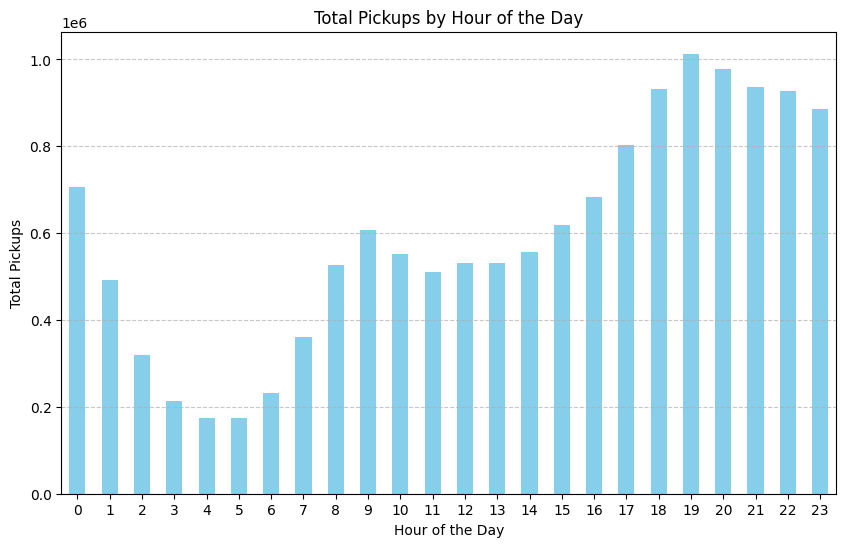

In [123]:
hourly_pickups = data.groupby(data['pickup_dt'].dt.hour)['pickups'].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
hourly_pickups.plot(kind='bar', color='skyblue')
plt.title('Total Pickups by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Pickups')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# *Summary of Analysis:

1. **Exploratory Data Analysis (EDA)**:
   - Cleaned and prepared data, ensuring integrity for analysis.
   - Calculated descriptive statistics to understand pickup patterns, weather impacts, and holiday effects.

2. **Key Findings**:
   - Manhattan has the highest pickups overall, with Queens showing the most increase during holidays.
   - Extreme weather like high temperatures and low visibility affects pickups variably across boroughs.
   - Holidays combined with weather influence pickup numbers, revealing nuanced rider behaviors.

3. **Correlations and Influential Factors**:
   - Sea level pressure shows minimal correlation with pickups.
   - Temperature has a slight positive correlation, suggesting warmer weather may slightly increase demand.

4. **Recommendations**:
   - Increase pickups during low-demand periods (e.g., late nights) through driver incentives and targeted promotions based on weather conditions.
   - Optimize driver allocation using predictive analytics to match demand fluctuations.

5. **Conclusion**:
   - Utilize weather insights and operational adjustments to enhance service efficiency and rider satisfaction across NYC.

This analysis provides actionable insights for Uber to strategically manage operations and meet rider demand effectively in New York City.

# Thank You !!